# Dependency Install

In [ ]:
!pip install pygame
!pip install optuna

# Library Import

In [ ]:
import os, sys, os.path
import time
import random
import numpy as np
import math

In [ ]:
import pygame

import gym

import cv2
from google.colab.patches import cv2_imshow
from google.colab import output

from keras.datasets import mnist
from matplotlib import pyplot
from PIL import Image
from google.colab import drive
drive.mount('/content/drive/')

pygame 2.1.2 (SDL 2.0.16, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import Tensor
from PIL import Image
from scipy import spatial
from torchvision.transforms import Compose, Resize, ToTensor
import time
import torch.optim as optim
from torchsummary import summary
import torchvision.transforms as transforms
import cv2

In [ ]:
from PIL import Image
import os, os.path
import time
import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import sys
import datetime
import time
import math
import json
from pathlib import Path
from functools import partial


import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.distributed as dist
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
from torchvision import models as torchvision_models
import torchvision

import subprocess
from collections import defaultdict, deque

import numpy as np
import torch
from torch import nn
import torch.distributed as dist
from PIL import ImageFilter, ImageOps
import random
import torch.distributed as dist


In [ ]:
from scipy import spatial
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import pandas as pd
from PIL import Image
import os, os.path
import time
from sklearn.metrics import accuracy_score,classification_report
from scipy.spatial import distance

In [ ]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io

In [ ]:
# Add this in a Google Colab cell to install the correct version of Pytorch Geometric.
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 

import networkx as nx
from torch_geometric.loader import DataLoader as GraphDataLoader
from torch_geometric.data import Data

Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html
Looking in links: https://pytorch-geometric.com/whl/torch-1.10.0+cu111.html


In [ ]:
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GATConv
import optuna

In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch_geometric.transforms import ToSLIC
from torch_geometric.nn import global_mean_pool

# Configurations

In [ ]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

In [ ]:
args = {
"arch":"vit_small" # choices=['vit_tiny', 'vit_small', 'vit_base', 'xcit', 'deit_tiny', 'deit_small'] help="""Name of architecture to train. For quick experiments with ViTs,we recommend using vit_tiny or vit_small.""")
,"patch_size":16 # help=Size in pixels of input square patches - default 16 (for 16x16 patches). Using smaller values leads to better performance but requires more memory
,"out_dim": 65536 # help=Dimensionality of the DINO head output. For complex and large datasets large values (like 65k) work well.
,"norm_last_layer":True #  help=Whether or not to weight normalize the last layer of the DINO head. Not normalizing leads to better performance but can make the training unstable. In our experiments, we typically set this paramater to False with vit_small and True with vit_base
,"momentum_teacher":0.996 # help="""Base EMA parameter for teacher update. The value is increased to 1 during training with cosine schedule. We recommend setting a higher value with small batches: for example use 0.9995 with batch size of 256."""
,"use_bn_in_head":False #help=Whether to use batch normalizations in projection head (Default: False)

# Temperature teacher parameters
,"warmup_teacher_temp":0.04 #  help="""Initial value for the teacher temperature: 0.04 works well in most cases.Try decreasing it if the training loss does not decrease."""
,"teacher_temp":0.04 # help="""Final value (after linear warmup) of the teacher temperature. For most experiments, anything above 0.07 is unstable. We recommend starting with the default value of 0.04 and increase this slightly if needed.""")
,"warmup_teacher_temp_epochs":0 #help=Number of warmup epochs for the teacher temperature (Default: 30).#

# Training/Optimization parameters
,"use_fp16":True #help=Whether or not to use half precision for training. Improves training time and memory requirements, but can provoke instability and slight decay of performance. We recommend disabling mixed precision if the loss is unstable, if reducing the patch size or if training with bigger ViTs.#
,"weight_decay":0.04 #help=Initial value of the weight decay. With ViT, a smaller value at the beginning of training works well.
,"weight_decay_end":0.4 #help=Final value of the weight decay. We use a cosine schedule for WD and using a larger decay by the end of training improves performance for ViTs.#
,"clip_grad":3.0 #help=Maximal parameter gradient norm if using gradient clipping. Clipping with norm .3 ~ 1.0 can help optimization for larger ViT architectures. 0 for disabling.#
,"batch_size_per_gpu":64 #help=Per-GPU batch-size : number of distinct images loaded on one GPU.#
,"epochs":20 #help=Number of epochs of training.#
,"freeze_last_layer":1 #help=Number of epochs during which we keep the output layer fixed. Typically doing so during the first epoch helps training. Try increasing this value if the loss does not decrease.#
,"lr":0.0005 #help=Learning rate at the end of linear warmup (highest LR used during training). The learning rate is linearly scaled with the batch size, and specified here for a reference batch size of 256.#
,"warmup_epochs":10 #help="Number of epochs for the linear learning-rate warm up.#
,"min_lr":1e-6 #help=Target LR at the end of optimization. We use a cosine LR schedule with linear warmup.#
,"optimizer":'adamw' #help=Type of optimizer. We recommend using adamw with ViTs.#
,"drop_path_rate":0.1 #help="stochastic depth rate#

# Multi-crop parameters
,"global_crops_scale":(0.4, 1.) #help=Scale range of the cropped image before resizing, relatively to the origin image. Used for large global view cropping. When disabling multi-crop (--local_crops_number 0), we recommand using a wider range of scale ("--global_crops_scale 0.14 1." for example)#
,"local_crops_number":8 #help=Number of small local views to generate. Set this parameter to 0 to disable multi-crop training. When disabling multi-crop we recommend to use "--global_crops_scale 0.14 1." #
,"local_crops_scale":(0.05,0.4) #help=Scale range of the cropped image before resizing, relatively to the origin image. Used for small local view cropping of multi-crop.#
# Misc
,"data_path":"/content/drive/MyDrive/Final Project/dataset/test/" #help=Please specify path to the ImageNet training data.#
,"output_dir":"." #help":Path to save logs and checkpoints.#
,"saveckp_freq":20 #help=Save checkpoint every x epochs.#
,"seed":0 #help=Random seed.#
,"num_workers":10 #help=Number of data loading workers per GPU.#
,"dist_url":"env://" #help="""url used to set up distributed training; see https://pytorch.org/docs/stable/distributed.html""")
,"local_rank":0 #help="Please ignore and do not set this argument.")
}


# Loading and Visualising Dataset

## Loading Mnist 

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Visualising Mnist

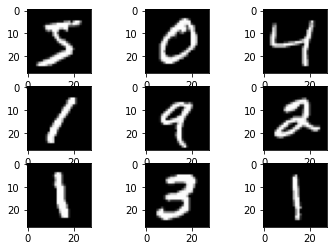

In [ ]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

##Dataset Loader Mnist



In [ ]:
class MnistDatasetTrainClass(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
      self.label =[]
      self.images = []
      self.label_dict = {}
      start_time = time.time()
      (self.trainX, self.trainy), (self.testX, self.testy) = mnist.load_data()
      self.width,self.height  = width,height
      print("|------Loaded Mnist Dataset------|")
      print('Train: X=%s, y=%s' % (self.trainX.shape, self.trainy.shape))
      print('Test: X=%s, y=%s' % (self.testX.shape, self.testy.shape))
      for i,label in enumerate(self.trainy):
        if label in self.label_dict:
          self.label_dict[label].append(i) 
        else: 
          self.label_dict[label] = [i]
          
      print("|------Test Dataset Generated------|")
      print(f"Total Labels {len(self.label_dict)} Time to load: {time.time() - start_time} seconds")

    def detach_cropped_area(self,im):
        # image = Image.fromarray(im)
        # newimage = image.resize((self.width,self.height))
        # scaler = MinMaxScaler(feature_range=(0,1))
        # scaler.fit(newimage)
        # newimage = scaler.transform(newimage)
        #numpy_array = np.asarray(cropped_img)
        # if debug == True && False:
        #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
        # print(newimage)
        #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
        # if debug == True:
        #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
        #   pyplot.imshow(Image.fromarray(numpy_array))
        #   pyplot.show()

        #return torch.tensor(np.array(newimage), dtype=torch.float32)
        return torch.tensor(np.array(im), dtype=torch.float32)

    def __getitem__(self, idx):
        clas = np.random.randint(0,10)
        idx_1,idx_2 = np.random.randint(0,len(self.label_dict[clas]),2) 
        img_1_idx,img_2_idx = self.label_dict[clas][idx_1],self.label_dict[clas][idx_2]
        img1 = self.detach_cropped_area(self.trainX[img_1_idx]).reshape(1,self.width,self.height)
        img2 = self.detach_cropped_area(self.trainX[img_2_idx]).reshape(1,self.width,self.height)
        y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
        
        clas2 = np.random.randint(0,10)
        while clas2 == clas:
            clas2 = np.random.randint(0,10)

        if clas2 == clas:
          print("Same  positive and negative labels detected")
        idx_3 = np.random.randint(0,len(self.label_dict[clas])) 
        idx_4 = np.random.randint(0,len(self.label_dict[clas2])) 
        img_3_idx,img_4_idx = self.label_dict[clas][idx_3],self.label_dict[clas2][idx_4]
        img3 = self.detach_cropped_area(self.trainX[img_3_idx]).reshape(1,self.width,self.height)
        img4 = self.detach_cropped_area(self.trainX[img_4_idx]).reshape(1,self.width,self.height)
        y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)
        
        # im = Image.fromarray(self.images[idx])
        # label = self.label[idx]
        # input_1 = torch.tensor(detach_cropped_area_test(im,(0, 10, 52, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # label_1 = torch.tensor(detach_cropped_area_test(im,(0, 52, 52, 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # input_2 = torch.tensor(detach_cropped_area_test(im,(85, 10, 130, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height )
        # label_2 = torch.tensor(detach_cropped_area_test(im,(85, 52, 130 , 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # query = torch.tensor(detach_cropped_area_test(im,(180, 35, 230 , 60)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)


        return  img1, img2, y1, img3, img4, y2
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.label_dict[0])
MnistDatasetTrain = MnistDatasetTrainClass(10000,width=28,height=28)
# train_dataloader_mnist = DataLoader(MnistDatasetTrain, shuffle=True, batch_size= 4,num_workers=1)
# for count_idx,data in enumerate(train_dataloader_mnist):
#   img1, img2, y1, img3, img4, y2 = data
#   print("-------------------------------")
#   print("-------------------------------")
#   print("------------img1-------------")
#   print(img1.shape)
#   im = pyplot.imshow(img1[0].numpy())
#   pyplot.show()
#   print("------------img2-------------")
#   im = pyplot.imshow(img2[0].numpy())
#   pyplot.show()
#   print("------------img3-------------")
#   im = pyplot.imshow(img3[0].numpy())
#   pyplot.show()
#   print("------------img4-------------")
#   im = pyplot.imshow(img4[0].numpy())
#   pyplot.show()
#   print("------------y1-------------")
#   print(y1)
#   print("------------y2-------------")
#   print(y2)
#   print("-------------------------------")
#   print("-------------------------------")
#   break


|------Loaded Mnist Dataset------|
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
|------Test Dataset Generated------|
Total Labels 10 Time to load: 0.30873942375183105 seconds


In [ ]:
class MnistDatasetTestClass(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
      self.label =[]
      self.images = []
      self.label_dict = {}
      start_time = time.time()
      (self.trainX, self.trainy), (self.testX, self.testy) = mnist.load_data()
      self.width,self.height  = width,height
      print("|------Loaded Mnist Dataset------|")
      print('Train: X=%s, y=%s' % (self.trainX.shape, self.trainy.shape))
      print('Test: X=%s, y=%s' % (self.testX.shape, self.testy.shape))
      for i,label in enumerate(self.testy):
        if label in self.label_dict:
          self.label_dict[label].append(i) 
        else: 
          self.label_dict[label] = [i]
          
      print("|------Test Dataset Generated------|")
      print(f"Total Labels {len(self.label_dict)} Time to load: {time.time() - start_time} seconds")

    def detach_cropped_area(self,im):
        # image = Image.fromarray(im)
        # newimage = image.resize((self.width,self.height))
        # scaler = MinMaxScaler(feature_range=(0,1))
        # scaler.fit(newimage)
        # newimage = scaler.transform(newimage)
        #numpy_array = np.asarray(cropped_img)
        # if debug == True && False:
        #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
        # print(newimage)
        #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
        # if debug == True:
        #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
        #   pyplot.imshow(Image.fromarray(numpy_array))
        #   pyplot.show()

        #return torch.tensor(np.array(newimage), dtype=torch.float32)
        return torch.tensor(np.array(im), dtype=torch.float32)

    def __getitem__(self, idx):
        clas = np.random.randint(0,10)
        idx_1,idx_2 = np.random.randint(0,len(self.label_dict[clas]),2) 
        img_1_idx,img_2_idx = self.label_dict[clas][idx_1],self.label_dict[clas][idx_2]
        img1 = self.detach_cropped_area(self.testX[img_1_idx]).reshape(1,self.width,self.height)
        img2 = self.detach_cropped_area(self.testX[img_2_idx]).reshape(1,self.width,self.height)
        y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
        
        clas2 = np.random.randint(0,10)
        while clas2 == clas:
            clas2 = np.random.randint(0,10)

        if clas2 == clas:
          print("Same  positive and negative labels detected")
        idx_3 = np.random.randint(0,len(self.label_dict[clas])) 
        idx_4 = np.random.randint(0,len(self.label_dict[clas2])) 
        img_3_idx,img_4_idx = self.label_dict[clas][idx_3],self.label_dict[clas2][idx_4]
        img3 = self.detach_cropped_area(self.testX[img_3_idx]).reshape(1,self.width,self.height)
        img4 = self.detach_cropped_area(self.testX[img_4_idx]).reshape(1,self.width,self.height)
        y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)
        
        # im = Image.fromarray(self.images[idx])
        # label = self.label[idx]
        # input_1 = torch.tensor(detach_cropped_area_test(im,(0, 10, 52, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # label_1 = torch.tensor(detach_cropped_area_test(im,(0, 52, 52, 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # input_2 = torch.tensor(detach_cropped_area_test(im,(85, 10, 130, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height )
        # label_2 = torch.tensor(detach_cropped_area_test(im,(85, 52, 130 , 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        # query = torch.tensor(detach_cropped_area_test(im,(180, 35, 230 , 60)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)


        return  img1, img2, y1, img3, img4, y2
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return 1000
MnistDatasetTest = MnistDatasetTestClass(1000,width=28,height=28)
# train_dataloader_mnist = DataLoader(MnistDatasetTrain, shuffle=True, batch_size= 4,num_workers=1)
# for count_idx,data in enumerate(train_dataloader_mnist):
#   img1, img2, y1, img3, img4, y2 = data
#   print("-------------------------------")
#   print("-------------------------------")
#   print("------------img1-------------")
#   print(img1.shape)
#   im = pyplot.imshow(img1[0].numpy())
#   pyplot.show()
#   print("------------img2-------------")
#   im = pyplot.imshow(img2[0].numpy())
#   pyplot.show()
#   print("------------img3-------------")
#   im = pyplot.imshow(img3[0].numpy())
#   pyplot.show()
#   print("------------img4-------------")
#   im = pyplot.imshow(img4[0].numpy())
#   pyplot.show()
#   print("------------y1-------------")
#   print(y1)
#   print("------------y2-------------")
#   print(y2)
#   print("-------------------------------")
#   print("-------------------------------")
#   break


|------Loaded Mnist Dataset------|
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
|------Test Dataset Generated------|
Total Labels 10 Time to load: 0.29763245582580566 seconds


# Environment

In [ ]:

window_width, window_height = 250, 80
os.environ["SDL_VIDEODRIVER"] = "dummy"
class CustomEnv(gym.Env):
    def __init__(self,env_config={},n_objects=2,debug=False):
      self.n_objects = n_objects
      self.corpus = {
      0 : 'zero',
      1 : 'one',
      2 : 'two',
      3 : 'three',
      4 : 'four',
      5 : 'five',
      6 : 'six',
      7 : 'seven',
      8 : 'eight',
      9 : 'nine', 
      }
      self.sprites_to_train = 2
      self.action_space = gym.spaces.Discrete(4)
      self.observation_space = gym.spaces.Box(
      low=0, high=255, shape=(window_height,window_width), dtype=np.float16)
      (self.trainx, self.trainy), (self.testx, self.testy) = self.loadDataset('mnist')
      self.classes = set(trainy)
      self.classes_len = len(self.classes)
      self.debug = debug
      # summarize loaded dataset
      if self.debug == True:
        print("|------------------ Dataset -----------------|")
        print(f'Train: X={self.trainx.shape}, y={self.trainy.shape}')
        print(f'Test: X={self.testx.shape}, y={self.testy.shape}')
        print(f'Classes: Unique={self.classes}, len={self.classes_len}')
        print("|--------------------------------------------|")
      self.reset()
    def loadDataset(self,dataset_name):
      if dataset_name == 'mnist':
        return mnist.load_data()

    def generate_unique_random(self,prev,corpus):
        
        input = random.choice(list(corpus.keys()))
        if (input in prev):
          while (input in prev):
            input = random.choice(list(corpus.keys()))
        return input

    def get_image_from_label(self,data,label):
        #get all indexes for given label from data and select an image as random 
        indexes = []
        for i in range(len(data[1])):
          if label == data[1][i]:
            indexes.append(i)        
        image_pixel= np.array(data[0][random.choice(indexes)]).T
        #img = Image.fromarray(image_pixel)
        return image_pixel

    def reset(self):
        pygame.init()
        pygame.font.init()
        self.window = pygame.display.set_mode((window_width, window_height))
        #self.myfont = pygame.font.SysFont(random.choice(sys_font_list), 15)
        self.myfont = pygame.font.SysFont("Arial", 15)
        self.clock = pygame.time.Clock()
        self.window.fill(0)
        self.objects = []
        self.instruction_pane_width = 120
        self.instruction_pane_height = window_height
        self.instruction_pane_x = window_width - self.instruction_pane_width
        self.instruction_pane_y = 0
        #Create agent
        
        self.inputs_choosen = []
        self.init_sprite("agent_0",0,0,15,15,path="./drive/MyDrive/Final Project/assets/mouse.png")  
        for i in range(self.sprites_to_train):
          #ensure same input is not choosen again
          input_label = self.generate_unique_random(self.inputs_choosen,self.corpus)
          sprite_iamge = self.get_image_from_label((self.trainx,self.trainy),input_label)
          #display inputs chosen
          # pyplot.imshow(sprite_iamge, cmap=pyplot.get_cmap('gray'))
          # pyplot.show()
          self.init_sprite("sprite_"+str(i),(i*45)+10,10,42,42,label_class = input_label,image = sprite_iamge,label=input_label,label_text=self.corpus[input_label],augmentation=True)
          self.inputs_choosen.append(input_label)
        if self.debug == True:
          print(f"Env Objects: {self.objects}")
        self.selected_instruction = random.choice(self.inputs_choosen)
        if self.debug == True:
          print(f"self.inputs_choosen: {self.inputs_choosen} self.selected_instruction {self.selected_instruction}")
        self.done = True
        self.render_screen()
        return self.observation_to_img(),self.inputs_choosen,self.selected_instruction

    def random_augmentation(self,sprite):
        #implement code for random augmentation here
        return sprite

    def init_sprite(self,id,x,y,width,height,label_class=None,path=None,image=None,label = None,label_text = None,augmentation=False):
        if path != None:
          sprite = pygame.transform.scale(pygame.image.load(path).convert_alpha(), (width,height)) 
        else:
          sprite = pygame.transform.scale(pygame.surfarray.make_surface(image), (width,height))
        if augmentation == True:
          sprite = self.random_augmentation(sprite) 
        color = (255,255,255)
        
        if label == None:
          self.objects.append(
            {
                "id" : id,
                "sprite" : sprite,
                "collision_box" : sprite.get_rect(x=(window_width - self.instruction_pane_width)/2, y=(window_height)/2),
                "color" : color,
                "path" : path,
            }
          )
        else:
          if id == "sprite_0":
            self.objects.append(
                {
                    "id" : id,
                    "sprite" : sprite,
                    "collision_box" : sprite.get_rect(x=0, y=y),
                    "label_text" : label_text,
                    "label" : self.myfont.render(label_text, False, color),
                    "label_position" : (x,y+height+5),
                    "label_class": label_class,
                    "color" : color,
                    "path" : path,
                }
            )
          if id == "sprite_1":
            self.objects.append(
                {
                    "id" : id,
                    "sprite" : sprite,
                    "collision_box" : sprite.get_rect(x=window_width - self.instruction_pane_width-width, y=y),
                    "label_text" : label_text,
                    "label" : self.myfont.render(label_text, False, color),
                    "label_position" : (window_width - self.instruction_pane_width-width,y+height+5),
                    "label_class": label_class,
                    "color" : color,                 
                    "path" : path,
                }
            )
    def check_agent_collision(self):
      sprite_collision_boxes = []
      for i in range(len(self.objects)):
        if self.objects[i]["id"] == "agent_0":
          agent_collision_box = self.objects[i]["collision_box"]
        else:
          sprite_collision_boxes.append(self.objects[i]["collision_box"])
      for i in range(len(sprite_collision_boxes)):
        if sprite_collision_boxes[i].colliderect(agent_collision_box):
          #print(f"Collision Detected between agent_0 and sprite_{i}")
          return True,"sprite_"+str(i)
      return False,None
    def move_sprite(self,id,x,y):
      for i in range(len(self.objects)):
        if self.objects[i]["id"] == id:
          collision_box = self.objects[i]["collision_box"]
          
          self.objects[i]["collision_box"] = self.objects[i]["sprite"].get_rect(x=collision_box.x+x, y=collision_box.y+y)
          collision_box = self.objects[i]["collision_box"]

        if collision_box.x >= window_width - self.instruction_pane_width or collision_box.x < 0 or collision_box.y >= window_height or collision_box.y < 0:
          self.done = True
    def step(self, action=np.zeros((4),dtype=np.int32)):
        if action == 0:  # Right
          self.move_sprite("agent_0",1,0)
        if action == 1:  # Left
          self.move_sprite("agent_0",-1,0)
        if action == 2:  # Up
          self.move_sprite("agent_0",0,-1)
        if action == 3:  # Down
          self.move_sprite("agent_0",0,1)
        collision,id = self.check_agent_collision() 
        if collision:
          for i in range(len(self.objects)):
            if self.objects[i]["id"] == id and self.objects[i]["label_class"] == self.selected_instruction:
              observation, reward, done, info = self.observation_to_img(), 100, self.done, {}
              self.reset()
              break;
            else:
              observation, reward, done, info = self.observation_to_img(), 0, self.done, {}

        else:
          observation, reward, done, info = self.observation_to_img(), 0, self.done, {}
        return observation, reward, done, info

    def observation_to_img(self):
        pygame.display.update()
        #convert image so it can be displayed in OpenCV
        view = pygame.surfarray.array3d(self.window)
        #  convert from (width, height, channel) to (height, width, channel)
        view = view.transpose([1, 0, 2])
        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2GRAY)
        return img_bgr

    def render_instructions(self):
        pygame.draw.rect(self.window, (0, 0,0), (self.instruction_pane_x,self.instruction_pane_y,self.instruction_pane_width,self.instruction_pane_height))
        title = self.myfont.render('Instructions:', False, (255, 255, 255))
        self.window.blit(title,(self.instruction_pane_x+20,20))
        instruction_1 = self.myfont.render(f'Find {self.corpus[self.selected_instruction]}', False, (255, 255, 255))
        self.window.blit(instruction_1,(self.instruction_pane_x+20,40))

    def render_screen(self):
        self.window.fill(0)
        # draw orientation
        # p1 = (self.x - 10 * np.cos(self.ang),self.y + 10 * np.sin(self.ang))
        # p2 = (self.x + 15 * np.cos(self.ang),self.y - 15 * np.sin(self.ang))
        # pygame.draw.line(self.window,(0,100,100),p1,p2,2)
        self.render_instructions()
        for elem in self.objects:
          self.window.blit(elem["sprite"], elem["collision_box"])
          if "label" in elem.keys():
            self.window.blit(elem["label"],elem["label_position"])
        #Display image, clear cell every 0.5 seconds
        #cv2_imshow(self.observation_to_img())
    def render(self):
        self.render_screen()
        time.sleep(0.1)
        output.clear()

environment = CustomEnv()
rewards = []


#Graph Neural Network

## Util

###Display Graph

In [ ]:
# Defining a Class
class GraphVisualization:
   
    def __init__(self,graph):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = graph['edge_index'].numpy().reshape(-1,2)
        self.labels = graph['x']
        self.label_dict = {}
        for idx,label in enumerate(self.labels):
          self.label_dict[idx] = str(idx)#+" : " + str(label.numpy()[0])
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G, node_size=500)
        plt.show()
#Driver Code
#Creating a basic graph using Pytorch Geometric

# edge_index = torch.tensor([[0, 1, 1, 2],
#                            [1, 0, 2, 1]], dtype=torch.long)
# x = torch.tensor([[-1], [0], [1]], dtype=int)

# data = Data(x=x, edge_index=edge_index)

# G = GraphVisualization(data)
# G.visualize()


## Segraph Create Graph

In [ ]:
def create_graph(grid):
    """
    This function creates a graph of vertices and edges from segments returned by SLIC.
    :param array grid: A grid of segments as returned by the slic function defined in skimage library
    :return: A graph as [vertices, edges]
    """
    try:
        import numpy as np
    except ImportError:
        print(
            "NumPY is not installed. segraph needs NumPY to function. Please use 'pip install numpy' to install numpy.")
        exit(0)
    #print("Creating a graph using segmented grid..")
    # get an array of unique labels
    try:
        vertices = np.unique(grid)

        # get number of vertices
        num_vertices = len(vertices)

        # map these unique labels to [1,...,N], where N is the number of labels (vertices)
        mapping = dict(zip(vertices, np.arange(num_vertices)))
        mapped_grid = np.array([mapping[x] for x in grid.flat]).reshape(grid.shape)

        # create edges, going left to right and top to bottom
        l2r = np.c_[mapped_grid[:, :-1].ravel(), mapped_grid[:, 1:].ravel()]
        t2b = np.c_[mapped_grid[:-1, :].ravel(), mapped_grid[1:, :].ravel()]

        # stack for entire graph
        edges = np.vstack([l2r, t2b])
        edges = edges[edges[:, 0] != edges[:, 1], :]
        edges = np.sort(edges, axis=1)

        # create a edge map, a hashmap
        edge_map = edges[:, 0] + num_vertices * edges[:, 1]

        # filter unique connections as edges
        edges = np.unique(edge_map)

        # reverse map and form edges as pairs
        edges = [[vertices[edge % num_vertices],
                  vertices[edge // num_vertices]] for edge in edges]
    except:
        print("Invalid argument supplied !")
        return None

    return vertices, edges

## DataLoader

### Mnist Train Dataloader

In [ ]:
class MnistGraph(Dataset):

    def __init__(self,num_of_samples):
        self.num_of_samples = num_of_samples
        (self.trainX, self.trainy), (self.testX, self.testy) = mnist.load_data()
        self.trainX=self.trainX[:self.num_of_samples]
        self.trainy=self.trainy[:self.num_of_samples]
        
    def __getitem__(self, idx):
        ip_image = Image.fromarray(self.trainX[idx]).resize((28,28))
        segments = slic(ip_image, n_segments=75, sigma=5)
        vertices, edges = create_graph(segments)
        # fig = plt.figure("Superpixels")
        # ax = fig.add_subplot(1, 1, 1)
        # ax.imshow(mark_boundaries(ip_image, segments))
        # plt.axis("off")
        # plt.show()
        # random_indexes = random.sample(list(np.arange(len(self.trainy))), self.samples_per_graph)
        # trainX=[]
        # trainy=[]
        # for i in random_indexes:
        #   trainX.append(self.trainX[i])
        #   trainy.append(self.trainy[i])
        # dataset_graph =  {}
        # #print(np.array(trainX).shape)

        x = torch.tensor(vertices, dtype=torch.float32 )
        y = self.trainy[idx]#F.one_hot(torch.tensor(trainy, dtype=torch.int64), num_classes=10).double()#torch.tensor(trainy, dtype=torch.int64)#
        edge_list = torch.tensor(edges, dtype=torch.int64).reshape(2,-1)
        data = Data(x=x, edge_index=edge_list,y=y)
        return  data

    def __len__(self):

        # here I gave a smaller length than the real dataset's length so that the training can be faster

        return self.num_of_samples

mnistGraph = MnistGraph(num_of_samples = 20000)
#Driver Code to seee one of the graphs
# loader = GraphDataLoader(mnistGraph, batch_size=4,num_workers=1)
# for batch in loader:
#   print(f"Batch {batch}")
#   print(f"batch.shape {np.array(batch).shape}")
#   print(f"Graph 0 {batch[0]}")
#   print(f"Node Data: {batch[0].x.shape}")
#   #print(f"Node Label: {batch[0].y[0]} type:{batch[0].y[0].dtype}")
#   #print(batch[0].x[0][0].dtype)
#   #pyplot.imshow(batch[0].x[0].reshape(81,81), cmap=pyplot.get_cmap('gray'))
#   #pyplot.show()
#   G = GraphVisualization(batch[0])
#   G.visualize()
#   break

In [ ]:
# from torch_geometric.utils import to_networkx
# G = to_networkx(dataset[0][0])

In [ ]:
# ##Driver Code to seee one of the graphs
# loader = GraphDataLoader(mnistGraph, batch_size=4,num_workers=1)
# for batch in loader:
#   print(f"Batch {batch}")
#   print(f"batch.shape {np.array(batch).shape}")
#   print(f"Graph 0 {np.array(batch[0])}")
#   print(f"Node Data: {batch[0].x.shape}")
#   print(f"Node Label: {batch[0].y[0]} type:{batch[0].y[0].dtype}")
#   print(batch[0].x[0][0].dtype)
#   pyplot.imshow(batch[0].x[0].reshape(81,81), cmap=pyplot.get_cmap('gray'))
#   pyplot.show()
#   G = GraphVisualization(batch[0])
#   G.visualize()
#   break

## Model

In [ ]:
# class GCN(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
        
#         self.conv1 = GCNConv(784, 64)#num_node_features
#         self.conv2 = GCNConv(64, 4)
#         self.conv3 = GCNConv(4, 10)
#         #self.conv3 = GCNConv(2, 10)
#         # self.conv4 = GCNConv(8, 16)
#         # self.conv5 = GCNConv(16, 10)
#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         x = self.conv1(x, edge_index)
#         x = F.relu(x)
#         x = F.dropout(x, training=self.training)
#         x = self.conv2(x, edge_index)
#         x = F.relu(x)
#         #x = F.dropout(x, training=self.training)
#         x = self.conv3(x, edge_index)
#         # x = F.relu(x)
#         # x = F.dropout(x, training=self.training)
#         # x = self.conv4(x, edge_index)
#         # x = F.relu(x)
#         # x = F.dropout(x, training=self.training)
#         # x = self.conv5(x, edge_index)
#         return F.log_softmax(x, dim=1)
class GNNEncoder(torch.nn.module):
    def __init__(self):
        super(GNNEncoder, self).__init__()
    def forward(self, 

class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1
        
        
        self.conv1 = GATConv(1, self.hid, heads=self.in_head, dropout=0.6)
        self.conv2 = GATConv(self.hid*self.in_head, self.hid,heads=self.in_head)
        self.conv3 = GATConv(self.hid*self.in_head, 128, concat=False,
                             heads=self.out_head)
        self.lin = nn.Linear(128, 10)

    def forward(self, data):
        x, edge_index,batch = data.x.reshape(-1,1), data.edge_index,data.batch
                
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv3(x, edge_index)
        x = global_mean_pool(x, batch)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin(x)
        
        return F.log_softmax(x, dim=1)


## Validation GNN

In [ ]:
def validationGNN(trained_model,batch_size):
  train_loader = GraphDataLoader(mnistGraph, batch_size=batch_size,num_workers=1)
  with torch.no_grad():
    model = trained_model
    model.eval()
    t_label = []
    p_labels = []
    count_correct = 0
    total_len = 0
    for itr,data in enumerate(train_loader):
        pred = model(data.cuda())
        # print(pred.argmax(dim=1))
        # print(data.y)
        count_correct += (torch.argmax(pred,dim=1) == torch.tensor(data.y).cuda() ).sum()
        total_len += int(len(pred))
    acc = int(count_correct) / int(total_len)
    print(f'|------------Accuracy: {acc:.4f} Total Correct Predicted{count_correct} out of {total_len}------------|')
    return count_correct
    


## Train One Epoch

In [ ]:
from torch_geometric.data import Data
from torch_geometric.datasets import MNISTSuperpixels
         
  #print(f"Validation accuracy: {classification_report(t_label,p_labels, target_names=['class 1'])}")

  
def train_gnn(model,batch_size, num_epochs, Criterion,Optimizer):
    train_losses = []
    train_loader = GraphDataLoader(mnistGraph, batch_size=batch_size,num_workers=1)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        count_correct = 0
        #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
        start_time = time.time()
        count = 0
        for count_idx,data in enumerate(train_loader):
          Optimizer.zero_grad()
          #print(data)
          out = model(data.cuda())
          
          # print(out.shape)
          # print(out[0])
          # print(torch.tensor(data.y).shape)
          # print(data.y[0])
          loss = Criterion(out, torch.tensor(data.y).cuda())
          loss.backward()
          Optimizer.step()
          running_loss += loss.item()
          # print("Predicted")
          # print(torch.argmax(out,dim=1).reshape(-1,1))
          # print("Target")
          # print(torch.tensor(data.y).reshape(-1,1))
          # print((torch.argmax(out,dim=1) == torch.tensor(data.y).cuda() ))
          count_correct += (torch.argmax(out,dim=1) == torch.tensor(data.y).cuda() ).sum()
        avg_train_loss = running_loss / batch_size
        train_losses.append(avg_train_loss)
        print(f'[Train]Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss} Correct Prediction: {count_correct} Accuracy:{count_correct / 60000} Time: {time.time() - start_time}')
        #if (epoch+1) % 100 == 0:
          #validationGNN(model,1)
    #print("Finished Training Saving Weights") 
        torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/gnn.pth")
 


## Main Method

In [ ]:
# model = GAT().cuda()#GCN().cuda()
# pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/gnn.pth"
# # if os.path.isfile(pretrained_weight_path):
# model.load_state_dict(torch.load(pretrained_weight_path))
# params = model.parameters()
# Criterion = F.nll_loss
# Optimizer = torch.optim.Adam(params, lr=0.0001, weight_decay=5e-4)
# train_gnn(model,16, 1000, Criterion,Optimizer)



In [ ]:
# 1. Define an objective function to be maximized.
def objective(trial):


    model = GAT().cuda()
    params = model.parameters()
    Criterion = F.nll_loss
    lr = trial.suggest_float(f'lr',1e-5,1e-1,log=True)
    Optimizer = torch.optim.Adam(params, lr=lr, weight_decay=5e-4)
    train_gnn(model,16, 3, Criterion,Optimizer)
    return validationGNN(model,1)

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-01-15 00:27:30,781] A new study created in memory with name: no-name-04a3dd52-6379-4ab5-9367-3bcb62b4490f
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 191.36692668497562 Correct Prediction: 1974 Accuracy:0.03290000185370445 Time: 45.21206307411194


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 237.29851457476616 Correct Prediction: 1991 Accuracy:0.03318333253264427 Time: 45.0516722202301


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 182.4291785210371 Correct Prediction: 2024 Accuracy:0.03373333439230919 Time: 45.151583433151245


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:32:05,568] Trial 0 finished with value: 2281.0 and parameters: {'lr': 0.026169181236368116}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 184.0369373857975 Correct Prediction: 2068 Accuracy:0.034466665238142014 Time: 44.911306381225586


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.7905713915825 Correct Prediction: 2132 Accuracy:0.03553333505988121 Time: 45.182061195373535


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.45218934118748 Correct Prediction: 2093 Accuracy:0.03488333523273468 Time: 44.96896147727966


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:36:42,500] Trial 1 finished with value: 2014.0 and parameters: {'lr': 0.00011819632005158924}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1007 Total Correct Predicted2014 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.9721607118845 Correct Prediction: 2013 Accuracy:0.03355000168085098 Time: 45.200538635253906


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.0694142729044 Correct Prediction: 2145 Accuracy:0.035750001668930054 Time: 45.36315369606018


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.90103617310524 Correct Prediction: 2220 Accuracy:0.03700000047683716 Time: 45.42331075668335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:41:19,020] Trial 2 finished with value: 2281.0 and parameters: {'lr': 0.002087787254175348}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.92459066212177 Correct Prediction: 2063 Accuracy:0.03438333421945572 Time: 45.02786636352539


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.13006961345673 Correct Prediction: 2088 Accuracy:0.03480000048875809 Time: 45.548951148986816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.99878884851933 Correct Prediction: 2199 Accuracy:0.036650002002716064 Time: 44.933337450027466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:45:54,377] Trial 3 finished with value: 2281.0 and parameters: {'lr': 0.0009526589094482116}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 183.39862179756165 Correct Prediction: 2037 Accuracy:0.03395000100135803 Time: 44.838380575180054


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 181.1250863224268 Correct Prediction: 1982 Accuracy:0.0330333337187767 Time: 44.9112389087677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.6659322977066 Correct Prediction: 2058 Accuracy:0.034299999475479126 Time: 44.9901397228241


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:50:28,940] Trial 4 finished with value: 2076.0 and parameters: {'lr': 6.769856472600791e-05}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1038 Total Correct Predicted2076 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 183.33768579363823 Correct Prediction: 2036 Accuracy:0.033933334052562714 Time: 45.13202500343323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 181.6692270040512 Correct Prediction: 2036 Accuracy:0.033933334052562714 Time: 45.69131684303284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.96303594112396 Correct Prediction: 2057 Accuracy:0.03428333252668381 Time: 44.83203125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:55:05,558] Trial 5 finished with value: 1775.0 and parameters: {'lr': 4.1700829926669675e-05}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0887 Total Correct Predicted1775 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 971.7464608699083 Correct Prediction: 1999 Accuracy:0.03331666812300682 Time: 45.057127237319946


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 204.29187820851803 Correct Prediction: 1903 Accuracy:0.031716667115688324 Time: 45.57479667663574


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 631.4630866795778 Correct Prediction: 1903 Accuracy:0.031716667115688324 Time: 45.11993169784546


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 00:59:41,862] Trial 6 finished with value: 2014.0 and parameters: {'lr': 0.056341584630650615}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1007 Total Correct Predicted2014 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 186.3309024721384 Correct Prediction: 2018 Accuracy:0.03363333269953728 Time: 45.19293189048767


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 183.192331507802 Correct Prediction: 2055 Accuracy:0.03424999862909317 Time: 45.37890911102295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 182.2498294711113 Correct Prediction: 2008 Accuracy:0.03346666693687439 Time: 45.39784288406372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:04:19,834] Trial 7 finished with value: 2076.0 and parameters: {'lr': 1.8407061731562152e-05}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1038 Total Correct Predicted2076 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 187.25818964838982 Correct Prediction: 2012 Accuracy:0.033533334732055664 Time: 45.40235137939453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 182.8911650776863 Correct Prediction: 2016 Accuracy:0.03359999880194664 Time: 45.4113335609436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 182.0205807685852 Correct Prediction: 2091 Accuracy:0.03485000133514404 Time: 45.13966608047485


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:08:57,419] Trial 8 finished with value: 2093.0 and parameters: {'lr': 2.2435281430624855e-05}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1047 Total Correct Predicted2093 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 2963.1122988313437 Correct Prediction: 1973 Accuracy:0.032883334904909134 Time: 45.676345109939575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 385.19116066396236 Correct Prediction: 1942 Accuracy:0.032366666942834854 Time: 45.514761209487915


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 2015.343149855733 Correct Prediction: 1969 Accuracy:0.03281666710972786 Time: 45.459125995635986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:13:34,780] Trial 9 finished with value: 2281.0 and parameters: {'lr': 0.08528430102912482}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.88712684810162 Correct Prediction: 1995 Accuracy:0.033250000327825546 Time: 45.19091296195984


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 181.79148076474667 Correct Prediction: 1975 Accuracy:0.03291666880249977 Time: 45.03160214424133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 181.8253290206194 Correct Prediction: 2016 Accuracy:0.03359999880194664 Time: 44.85545110702515


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:18:09,913] Trial 10 finished with value: 1775.0 and parameters: {'lr': 0.010573010052262844}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0887 Total Correct Predicted1775 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.11644381284714 Correct Prediction: 2042 Accuracy:0.03403333202004433 Time: 45.028972148895264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.00687040388584 Correct Prediction: 2191 Accuracy:0.036516666412353516 Time: 44.6030216217041


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.89260616898537 Correct Prediction: 2215 Accuracy:0.036916665732860565 Time: 45.107321977615356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:22:44,639] Trial 11 finished with value: 1994.0 and parameters: {'lr': 0.0035474078500299802}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.04692742228508 Correct Prediction: 2080 Accuracy:0.03466666862368584 Time: 45.269646883010864


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.08933736383915 Correct Prediction: 2097 Accuracy:0.034949999302625656 Time: 45.2088840007782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.984437584877 Correct Prediction: 2159 Accuracy:0.035983335226774216 Time: 45.25390100479126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:27:22,538] Trial 12 finished with value: 2281.0 and parameters: {'lr': 0.0010256547685590291}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 184.59656310081482 Correct Prediction: 1992 Accuracy:0.03319999948143959 Time: 45.256866216659546


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 185.0033303797245 Correct Prediction: 1952 Accuracy:0.03253333270549774 Time: 45.65752577781677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 186.2573176473379 Correct Prediction: 1946 Accuracy:0.03243333473801613 Time: 45.136723279953


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:31:58,990] Trial 13 finished with value: 1994.0 and parameters: {'lr': 0.016312155673884693}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.3054707199335 Correct Prediction: 2015 Accuracy:0.03358333185315132 Time: 45.138848066329956


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.16331079602242 Correct Prediction: 2100 Accuracy:0.03500000014901161 Time: 45.59842085838318


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.9984120130539 Correct Prediction: 2187 Accuracy:0.03644999861717224 Time: 45.32948708534241


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:36:36,807] Trial 14 finished with value: 1922.0 and parameters: {'lr': 0.00045703432910437503}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0961 Total Correct Predicted1922 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.04956732690334 Correct Prediction: 1992 Accuracy:0.03319999948143959 Time: 45.09844970703125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.2196361720562 Correct Prediction: 2049 Accuracy:0.03415000066161156 Time: 44.921788692474365


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.67259900271893 Correct Prediction: 2087 Accuracy:0.03478333353996277 Time: 45.22308015823364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:41:13,523] Trial 15 finished with value: 1994.0 and parameters: {'lr': 0.006631827283878645}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 196.63262067735195 Correct Prediction: 1970 Accuracy:0.03283333405852318 Time: 44.88378858566284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 188.12613973021507 Correct Prediction: 1974 Accuracy:0.03290000185370445 Time: 45.183603048324585


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 194.51198115944862 Correct Prediction: 1901 Accuracy:0.03168333321809769 Time: 45.042524099349976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:45:49,148] Trial 16 finished with value: 1929.0 and parameters: {'lr': 0.02588009612587456}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0964 Total Correct Predicted1929 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.9982886761427 Correct Prediction: 2035 Accuracy:0.033916667103767395 Time: 45.46368622779846


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.3239392787218 Correct Prediction: 2067 Accuracy:0.03445000201463699 Time: 44.993237257003784


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.0900021791458 Correct Prediction: 2129 Accuracy:0.035483334213495255 Time: 45.17303943634033


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:50:26,063] Trial 17 finished with value: 1922.0 and parameters: {'lr': 0.0002553079076785416}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0961 Total Correct Predicted1922 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.91778503358364 Correct Prediction: 2051 Accuracy:0.034183334559202194 Time: 45.4127402305603


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.12117120623589 Correct Prediction: 2083 Accuracy:0.034716665744781494 Time: 45.26326131820679


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.94833540916443 Correct Prediction: 2217 Accuracy:0.0369499996304512 Time: 45.09301829338074


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:55:02,458] Trial 18 finished with value: 1994.0 and parameters: {'lr': 0.0013107352832411052}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.88661669194698 Correct Prediction: 2034 Accuracy:0.033900000154972076 Time: 45.44407391548157


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.26504881680012 Correct Prediction: 2109 Accuracy:0.03514999896287918 Time: 45.05051565170288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.07092407345772 Correct Prediction: 2099 Accuracy:0.03498333320021629 Time: 45.6569926738739


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 01:59:38,595] Trial 19 finished with value: 1994.0 and parameters: {'lr': 0.00044845641681714744}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.95465816557407 Correct Prediction: 2081 Accuracy:0.034683335572481155 Time: 45.016711711883545


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 179.96545380353928 Correct Prediction: 2192 Accuracy:0.036533333361148834 Time: 45.73105239868164


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.99782916903496 Correct Prediction: 2179 Accuracy:0.03631666675209999 Time: 45.153037786483765


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:04:16,409] Trial 20 finished with value: 1994.0 and parameters: {'lr': 0.004299304190980805}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.91302494704723 Correct Prediction: 1991 Accuracy:0.03318333253264427 Time: 45.49993443489075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 179.99742360413074 Correct Prediction: 2181 Accuracy:0.03635000064969063 Time: 45.8406937122345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.88374261558056 Correct Prediction: 2257 Accuracy:0.03761666640639305 Time: 45.920684576034546


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:08:54,614] Trial 21 finished with value: 2281.0 and parameters: {'lr': 0.0022674079110312747}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 1523.4607912749052 Correct Prediction: 1954 Accuracy:0.03256666660308838 Time: 45.44494080543518


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 226.09933007508516 Correct Prediction: 1979 Accuracy:0.03298333287239075 Time: 45.63000440597534


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 4051.3027824163437 Correct Prediction: 2018 Accuracy:0.03363333269953728 Time: 45.48107075691223


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:13:33,545] Trial 22 finished with value: 1971.0 and parameters: {'lr': 0.0822735322259136}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0985 Total Correct Predicted1971 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 191.44173085689545 Correct Prediction: 1962 Accuracy:0.03270000219345093 Time: 46.09657597541809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 192.32457511126995 Correct Prediction: 1968 Accuracy:0.03280000016093254 Time: 45.651028633117676


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 195.78877334296703 Correct Prediction: 1908 Accuracy:0.03180000185966492 Time: 45.24463200569153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:18:12,546] Trial 23 finished with value: 1971.0 and parameters: {'lr': 0.02613221784481664}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0985 Total Correct Predicted1971 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.01984922587872 Correct Prediction: 1974 Accuracy:0.03290000185370445 Time: 45.589298725128174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.14234705269337 Correct Prediction: 2129 Accuracy:0.035483334213495255 Time: 45.33074879646301


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.94771844148636 Correct Prediction: 2181 Accuracy:0.03635000064969063 Time: 45.182950496673584


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:22:49,281] Trial 24 finished with value: 1994.0 and parameters: {'lr': 0.0019229932607486649}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 370.7442502230406 Correct Prediction: 1918 Accuracy:0.031966667622327805 Time: 45.29314732551575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 187.81498077511787 Correct Prediction: 1909 Accuracy:0.031816668808460236 Time: 45.63616323471069


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 187.84324905276299 Correct Prediction: 1946 Accuracy:0.03243333473801613 Time: 46.0599308013916


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:27:27,687] Trial 25 finished with value: 1775.0 and parameters: {'lr': 0.04534766293963146}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0887 Total Correct Predicted1775 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 310.6098975390196 Correct Prediction: 1919 Accuracy:0.03198333457112312 Time: 46.17144441604614


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 6562.8069043159485 Correct Prediction: 1926 Accuracy:0.032099999487400055 Time: 45.19201469421387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 236.8663633465767 Correct Prediction: 1945 Accuracy:0.03241666778922081 Time: 45.371323585510254


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:32:07,448] Trial 26 finished with value: 1775.0 and parameters: {'lr': 0.0987529126737173}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0887 Total Correct Predicted1775 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.34467129409313 Correct Prediction: 1991 Accuracy:0.03318333253264427 Time: 45.81082487106323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.16366581618786 Correct Prediction: 2114 Accuracy:0.035233333706855774 Time: 45.413426637649536


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.0558859705925 Correct Prediction: 2100 Accuracy:0.03500000014901161 Time: 45.977673292160034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:36:46,340] Trial 27 finished with value: 2281.0 and parameters: {'lr': 0.0005210569770971885}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 183.03258745372295 Correct Prediction: 2031 Accuracy:0.03384999930858612 Time: 45.6951105594635


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.7825599461794 Correct Prediction: 2066 Accuracy:0.034433335065841675 Time: 45.65615177154541


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.3785924166441 Correct Prediction: 2162 Accuracy:0.03603333234786987 Time: 45.76927042007446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:41:23,638] Trial 28 finished with value: 1945.0 and parameters: {'lr': 0.00014587917671152678}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0973 Total Correct Predicted1945 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.5535520762205 Correct Prediction: 1945 Accuracy:0.03241666778922081 Time: 45.986127614974976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.7083501815796 Correct Prediction: 2023 Accuracy:0.03371666744351387 Time: 45.54913902282715


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 181.48681192100048 Correct Prediction: 2001 Accuracy:0.03335000202059746 Time: 45.06425070762634


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:46:01,131] Trial 29 finished with value: 1994.0 and parameters: {'lr': 0.009089508996380743}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.60931223630905 Correct Prediction: 2050 Accuracy:0.034166667610406876 Time: 45.28298211097717


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.33952440321445 Correct Prediction: 2074 Accuracy:0.034566666930913925 Time: 45.13807153701782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.12932486832142 Correct Prediction: 2178 Accuracy:0.03629999980330467 Time: 45.626479625701904


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:50:38,415] Trial 30 finished with value: 2076.0 and parameters: {'lr': 0.0001876239676525355}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1038 Total Correct Predicted2076 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.32470485568047 Correct Prediction: 2076 Accuracy:0.03460000082850456 Time: 45.613041639328


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.21305678784847 Correct Prediction: 2080 Accuracy:0.03466666862368584 Time: 45.250043630599976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.05037301778793 Correct Prediction: 2149 Accuracy:0.03581666573882103 Time: 45.063546657562256


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:55:15,019] Trial 31 finished with value: 1994.0 and parameters: {'lr': 0.00047846687066419497}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.0913178473711 Correct Prediction: 1995 Accuracy:0.033250000327825546 Time: 44.94253206253052


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.03964386880398 Correct Prediction: 2153 Accuracy:0.035883333534002304 Time: 45.02212429046631


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.8737534582615 Correct Prediction: 2227 Accuracy:0.03711666539311409 Time: 44.816280126571655


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 02:59:53,117] Trial 32 finished with value: 2281.0 and parameters: {'lr': 0.002311839972175859}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.03438633680344 Correct Prediction: 2036 Accuracy:0.033933334052562714 Time: 45.40634369850159


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.13907700777054 Correct Prediction: 2087 Accuracy:0.03478333353996277 Time: 45.632282733917236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.03424789011478 Correct Prediction: 2185 Accuracy:0.0364166684448719 Time: 45.416736364364624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:04:30,065] Trial 33 finished with value: 1994.0 and parameters: {'lr': 0.0007623391934508023}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.96028432250023 Correct Prediction: 2024 Accuracy:0.03373333439230919 Time: 45.49440026283264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 179.99487380683422 Correct Prediction: 2174 Accuracy:0.0362333320081234 Time: 45.58225774765015


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.86129926145077 Correct Prediction: 2259 Accuracy:0.03765000030398369 Time: 45.023725509643555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:09:07,564] Trial 34 finished with value: 2281.0 and parameters: {'lr': 0.002814979365983302}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.5750086903572 Correct Prediction: 1993 Accuracy:0.03321666643023491 Time: 45.325454235076904


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.6861962378025 Correct Prediction: 2059 Accuracy:0.034316666424274445 Time: 44.98993968963623


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.36659464240074 Correct Prediction: 2076 Accuracy:0.03460000082850456 Time: 45.71692180633545


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:13:46,036] Trial 35 finished with value: 2014.0 and parameters: {'lr': 8.114574881593744e-05}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1007 Total Correct Predicted2014 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.1565294265747 Correct Prediction: 1979 Accuracy:0.03298333287239075 Time: 45.341853618621826


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.04117396473885 Correct Prediction: 2151 Accuracy:0.03584999963641167 Time: 45.36970663070679


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.23587653040886 Correct Prediction: 2145 Accuracy:0.035750001668930054 Time: 44.910841941833496


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:18:23,628] Trial 36 finished with value: 1994.0 and parameters: {'lr': 0.0055649596142912676}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.1700804978609 Correct Prediction: 2003 Accuracy:0.0333833321928978 Time: 45.5604932308197


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.22928845882416 Correct Prediction: 2104 Accuracy:0.035066667944192886 Time: 44.99932837486267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.022225856781 Correct Prediction: 2158 Accuracy:0.0359666682779789 Time: 44.67330837249756


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:22:59,444] Trial 37 finished with value: 1994.0 and parameters: {'lr': 0.0012064345185463922}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.57698233425617 Correct Prediction: 2075 Accuracy:0.034583333879709244 Time: 45.28299283981323


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.11254267394543 Correct Prediction: 2167 Accuracy:0.036116667091846466 Time: 45.406065940856934


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.0216919928789 Correct Prediction: 2098 Accuracy:0.034966666251420975 Time: 44.7437059879303


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:27:35,257] Trial 38 finished with value: 2281.0 and parameters: {'lr': 0.0006659367737514863}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.97980600595474 Correct Prediction: 2002 Accuracy:0.03336666524410248 Time: 45.624077558517456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.07348504662514 Correct Prediction: 2135 Accuracy:0.03558333218097687 Time: 45.47550368309021


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.87868358194828 Correct Prediction: 2222 Accuracy:0.037033334374427795 Time: 45.08089470863342


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:32:14,170] Trial 39 finished with value: 1994.0 and parameters: {'lr': 0.002146755084681912}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.0997 Total Correct Predicted1994 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 182.23597069084644 Correct Prediction: 2085 Accuracy:0.03474999964237213 Time: 44.92297387123108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.28110882639885 Correct Prediction: 2101 Accuracy:0.03501666709780693 Time: 45.337159395217896


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.13710741698742 Correct Prediction: 2118 Accuracy:0.03530000150203705 Time: 45.48346829414368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:36:50,287] Trial 40 finished with value: 2281.0 and parameters: {'lr': 0.0002786774836404291}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 181.0086444169283 Correct Prediction: 2081 Accuracy:0.034683335572481155 Time: 44.797179222106934


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 180.14217288792133 Correct Prediction: 2132 Accuracy:0.03553333505988121 Time: 45.24765157699585


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 180.04635372757912 Correct Prediction: 2049 Accuracy:0.03415000066161156 Time: 45.35052943229675


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:41:27,739] Trial 41 finished with value: 2281.0 and parameters: {'lr': 0.0008136032494908187}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [1/3], Loss: 180.91938523948193 Correct Prediction: 2018 Accuracy:0.03363333269953728 Time: 44.97957921028137


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [2/3], Loss: 179.9766634553671 Correct Prediction: 2166 Accuracy:0.03610000014305115 Time: 45.003390073776245


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



[Train]Epoch [3/3], Loss: 179.86961555480957 Correct Prediction: 2235 Accuracy:0.03725000098347664 Time: 45.787787675857544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.

[I 2022-01-15 03:46:03,249] Trial 42 finished with value: 2281.0 and parameters: {'lr': 0.0030187073370845367}. Best is trial 0 with value: 2281.0.


|------------Accuracy: 0.1140 Total Correct Predicted2281 out of 20000------------|


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning:

skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.



KeyboardInterrupt: ignored

In [ ]:
[-2.3249, -2.2992, -2.2826, -2.2780, -2.3314, -2.2974, -2.2823, -2.3386,
        -2.3001, -2.2935]

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
print(f"input {input}")
print(f"Softmax input {F.log_softmax(input)}")
target = torch.tensor([1, 0, 4])
print(f"target {target}")
output = F.nll_loss(F.log_softmax(input), target)
print(output)
output.backward()

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)
        
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print(edge_index .dtype)
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(5):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    break

In [ ]:
import torch
from torch_scatter import scatter_mean

from torch_geometric.data import Data
from torch_geometric.transforms import BaseTransform


class ToSLIC(BaseTransform):
    """Converts an image to a superpixel representation using the
    :meth:`skimage.segmentation.slic` algorithm, resulting in a
    :obj:`torch_geometric.data.Data` object holding the centroids of
    superpixels in :obj:`pos` and their mean color in :obj:`x`.

    This transform can be used with any :obj:`torchvision` dataset.

    Example::

        from torchvision.datasets import MNIST
        import torchvision.transforms as T
        from torch_geometric.transforms import ToSLIC

        transform = T.Compose([T.ToTensor(), ToSLIC(n_segments=75)])
        dataset = MNIST('/tmp/MNIST', download=True, transform=transform)

    Args:
        add_seg (bool, optional): If set to `True`, will add the segmentation
            result to the data object. (default: :obj:`False`)
        add_img (bool, optional): If set to `True`, will add the input image
            to the data object. (default: :obj:`False`)
        **kwargs (optional): Arguments to adjust the output of the SLIC
            algorithm. See the `SLIC documentation
            <https://scikit-image.org/docs/dev/api/skimage.segmentation.html
            #skimage.segmentation.slic>`_ for an overview.
    """
    def __init__(self, add_seg=False, add_img=False, **kwargs):
        self.add_seg = add_seg
        self.add_img = add_img
        self.kwargs = kwargs

    def __call__(self, img):
        from skimage.segmentation import slic

        img = img.permute(1, 2, 0)
        h, w, c = img.size()

        seg = slic(img.to(torch.double).numpy(), start_label=0, **self.kwargs)
        seg = torch.from_numpy(seg)

        x = scatter_mean(img.view(h * w, c), seg.view(h * w), dim=0)

        pos_y = torch.arange(h, dtype=torch.float)
        pos_y = pos_y.view(-1, 1).repeat(1, w).view(h * w)
        pos_x = torch.arange(w, dtype=torch.float)
        pos_x = pos_x.view(1, -1).repeat(h, 1).view(h * w)

        pos = torch.stack([pos_x, pos_y], dim=-1)
        pos = scatter_mean(pos, seg.view(h * w), dim=0)

        data = Data(x=x, pos=pos)

        if self.add_seg:
            data.seg = seg.view(1, h, w)

        if self.add_img:
            data.img = img.permute(2, 0, 1).view(1, c, h, w)

        return data


from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch_geometric.transforms import ToSLIC

transform = T.Compose([T.ToTensor(), ToSLIC(n_segments=75)])
dataset = MNIST('/tmp/MNIST', download=True, transform=transform)


In [ ]:
class GraphVisualization:
   
    def __init__(self,graph):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = graph['pos'].numpy().reshape(-1,2)
        self.labels = graph['x']
        
        self.label_dict = {}
        for idx,label in enumerate(self.labels):
          self.label_dict[idx] = str(idx)#+" : " + str(label.numpy()[0])
        print(self.label_dict)
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G, node_size=500)
        plt.show()

data = dataset[4][0]

G = GraphVisualization(data)
G.visualize()

# Utils

## Detach and Crop

### Train

In [ ]:
# training and validation loss were calculated after every epoch
def transform(img):
    transform = transforms.Compose([
    transforms.RandomApply(transforms = [
    transforms.RandomHorizontalFlip(p=0.5),
      # transforms.RandomApply(
      #     [transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.2, hue=0.1)],
      #     p=0.8
      # ),
      transforms.RandomRotation(
          degrees=45
      ),  # Perhaps a random rotation from -45 to 45 degrees
    #   #transforms.RandomInvert(),
    #   #transforms.RandomEqualize(),
    #   # transforms.RandomHorizontalFlip(
    #   #     p=0.5
    #   # ),  # Flips the image horizontally with probability 0.5
    #   # transforms.RandomVerticalFlip(
    #   #     p=0.05
    #   # ),  # Flips image vertically with probability 0.05

    transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
    ], p =0.3),
    transforms.ToTensor()  # Finally converts PIL image to tensor so we can train w. pytorch
    # transforms.Normalize(
    #     mean=[0.5], std=[0.5]
    # ), 
    ])
    transformed_img = transform(img).numpy()
    return transformed_img

def detach_cropped_area(im,coods,debug = False):
  im_width = 224
  im_height = 224
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((im_width,im_height))
  scaler = MinMaxScaler(feature_range=(0,1))
  scaler.fit(newimage)
  newimage = scaler.transform(newimage)
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  # print(newimage)
  # pyplot.imshow(newimage)
  # pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  return transform(Image.fromarray(newimage))

### Test

In [ ]:
def detach_cropped_area_test(im,coods,debug = False):
  im_width = 224
  im_height = 224
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((im_width,im_height))
  scaler = MinMaxScaler(feature_range=(0,1))
  scaler.fit(newimage)
  newimage = scaler.transform(newimage)
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  # print(newimage)
  # pyplot.imshow(newimage)
  # pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  return newimage

## Test Dataset Generator

In [ ]:
class DatasetTest(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
        self.label =[]
        self.images = []
        self.img_width,self.img_height = width,height
        start_time = time.time()
        for i in range(num_samples):
          self.image,input_digits,selected_digit = environment.reset()
          self.images.append(self.image)
          self.label.append(input_digits.index(selected_digit))
        print("|------Test Dataset Generated------|")
        print(f"Total Images {np.array(self.images).shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
    def __getitem__(self, idx):
        
        im = Image.fromarray(self.images[idx])
        label = self.label[idx]
        input_1 = torch.tensor(detach_cropped_area_test(im,(0, 10, 52, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        label_1 = torch.tensor(detach_cropped_area_test(im,(0, 52, 52, 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        input_2 = torch.tensor(detach_cropped_area_test(im,(85, 10, 130, 52)), dtype=torch.float32).reshape(1,self.img_width,self.img_height )
        label_2 = torch.tensor(detach_cropped_area_test(im,(85, 52, 130 , 82)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)
        query = torch.tensor(detach_cropped_area_test(im,(180, 35, 230 , 60)), dtype=torch.float32).reshape(1,self.img_width,self.img_height)


        return  input_1, label_1, input_2 , label_2, query, label
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.images)
testDataset = DatasetTest(300)


## Trunc Normal

In [ ]:
def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    # Cut & paste from PyTorch official master until it's in a few official releases - RW
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.

    with torch.no_grad():
        # Values are generated by using a truncated uniform distribution and
        # then using the inverse CDF for the normal distribution.
        # Get upper and lower cdf values
        l = norm_cdf((a - mean) / std)
        u = norm_cdf((b - mean) / std)

        # Uniformly fill tensor with values from [l, u], then translate to
        # [2l-1, 2u-1].
        tensor.uniform_(2 * l - 1, 2 * u - 1)

        # Use inverse cdf transform for normal distribution to get truncated
        # standard normal
        tensor.erfinv_()

        # Transform to proper mean, std
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)

        # Clamp to ensure it's in the proper range
        tensor.clamp_(min=a, max=b)
        return tensor


def trunc_normal_(tensor, mean=0., std=1., a=-2., b=2.):
    # type: (Tensor, float, float, float, float) -> Tensor
    return _no_grad_trunc_normal_(tensor, mean, std, a, b)

## Lars

In [ ]:
class LARS(torch.optim.Optimizer):
    """
    Almost copy-paste from https://github.com/facebookresearch/barlowtwins/blob/main/main.py
    """
    def __init__(self, params, lr=0, weight_decay=0, momentum=0.9, eta=0.001,
                 weight_decay_filter=None, lars_adaptation_filter=None):
        defaults = dict(lr=lr, weight_decay=weight_decay, momentum=momentum,
                        eta=eta, weight_decay_filter=weight_decay_filter,
                        lars_adaptation_filter=lars_adaptation_filter)
        super().__init__(params, defaults)

    @torch.no_grad()
    def step(self):
        for g in self.param_groups:
            for p in g['params']:
                dp = p.grad

                if dp is None:
                    continue

                if p.ndim != 1:
                    dp = dp.add(p, alpha=g['weight_decay'])

                if p.ndim != 1:
                    param_norm = torch.norm(p)
                    update_norm = torch.norm(dp)
                    one = torch.ones_like(param_norm)
                    q = torch.where(param_norm > 0.,
                                    torch.where(update_norm > 0,
                                                (g['eta'] * param_norm / update_norm), one), one)
                    dp = dp.mul(q)

                param_state = self.state[p]
                if 'mu' not in param_state:
                    param_state['mu'] = torch.zeros_like(p)
                mu = param_state['mu']
                mu.mul_(g['momentum']).add_(dp)

                p.add_(mu, alpha=-g['lr'])

## Get Param Groups

In [ ]:
def get_params_groups(model):
    regularized = []
    not_regularized = []
    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue
        # we do not regularize biases nor Norm parameters
        if name.endswith(".bias") or len(param.shape) == 1:
            not_regularized.append(param)
        else:
            regularized.append(param)
    return [{'params': regularized}, {'params': not_regularized, 'weight_decay': 0.}]

# Vision Transformer (ViT)



### Patch Embedding

In [ ]:
class PatchEmbed(nn.Module):
    """ Image to Patch Embedding
    """
    def __init__(self, img_size=224, patch_size=16, in_chans=1, embed_dim=768):
        super().__init__()
        num_patches = (img_size // patch_size) * (img_size // patch_size)
        self.img_size = img_size
        self.patch_size = patch_size
        self.num_patches = num_patches

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x

### DropPath

In [ ]:
def drop_path(x, drop_prob: float = 0., training: bool = False):
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_()  # binarize
    output = x.div(keep_prob) * random_tensor
    return output


class DropPath(nn.Module):
    """Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks).
    """
    def __init__(self, drop_prob=None):
        super(DropPath, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)

### Multi Layer Perceptron

In [ ]:
class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

### Attention

In [ ]:
class Attention(nn.Module):
    def __init__(self, dim, num_heads=16, qkv_bias=False, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        attn = (q @ k.transpose(-2, -1)) * self.scale
        attn = attn.softmax(dim=-1)
        attn = self.attn_drop(attn)

        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x, attn

### Attention Block

In [ ]:
class Block(nn.Module):
    def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.norm1 = norm_layer(dim)
        self.attn = Attention(
            dim, num_heads=num_heads, qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

    def forward(self, x, return_attention=False):
        y, attn = self.attn(self.norm1(x))
        if return_attention:
            return attn
        x = x + self.drop_path(y)
        x = x + self.drop_path(self.mlp(self.norm2(x)))
        return x

### Vision Transformer Network

In [ ]:
class VisionTransformer(nn.Module):
    """ Vision Transformer """
    def __init__(self, img_size=[224], patch_size=8, in_chans=1, num_classes=0, embed_dim=768, depth=12,
                 num_heads=12, mlp_ratio=4., qkv_bias=False, qk_scale=None, drop_rate=0., attn_drop_rate=0.,
                 drop_path_rate=0., norm_layer=nn.LayerNorm, **kwargs):
        super().__init__()
        self.num_features = self.embed_dim = embed_dim

        self.patch_embed = PatchEmbed(
            img_size=img_size[0], patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim)
        num_patches = self.patch_embed.num_patches

        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, num_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, depth)]  # stochastic depth decay rule
        self.blocks = nn.ModuleList([
            Block(
                dim=embed_dim, num_heads=num_heads, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, qk_scale=qk_scale,
                drop=drop_rate, attn_drop=attn_drop_rate, drop_path=dpr[i], norm_layer=norm_layer)
            for i in range(depth)])
        self.norm = norm_layer(embed_dim)

        # Classifier head
        self.head = nn.Linear(embed_dim, num_classes) if num_classes > 0 else nn.Identity()

        trunc_normal_(self.pos_embed, std=.02)
        trunc_normal_(self.cls_token, std=.02)
        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def interpolate_pos_encoding(self, x, w, h):
        npatch = x.shape[1] - 1
        N = self.pos_embed.shape[1] - 1
        if npatch == N and w == h:
            return self.pos_embed
        class_pos_embed = self.pos_embed[:, 0]
        patch_pos_embed = self.pos_embed[:, 1:]
        dim = x.shape[-1]
        w0 = w // self.patch_embed.patch_size
        h0 = h // self.patch_embed.patch_size
        # we add a small number to avoid floating point error in the interpolation
        # see discussion at https://github.com/facebookresearch/dino/issues/8
        w0, h0 = w0 + 0.1, h0 + 0.1
        patch_pos_embed = nn.functional.interpolate(
            patch_pos_embed.reshape(1, int(math.sqrt(N)), int(math.sqrt(N)), dim).permute(0, 3, 1, 2),
            scale_factor=(w0 / math.sqrt(N), h0 / math.sqrt(N)),
            mode='bicubic',
        )
        assert int(w0) == patch_pos_embed.shape[-2] and int(h0) == patch_pos_embed.shape[-1]
        patch_pos_embed = patch_pos_embed.permute(0, 2, 3, 1).view(1, -1, dim)
        return torch.cat((class_pos_embed.unsqueeze(0), patch_pos_embed), dim=1)

    def prepare_tokens(self, x):
        B, nc, w, h = x.shape
        x = self.patch_embed(x)  # patch linear embedding

        # add the [CLS] token to the embed patch tokens
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        # add positional encoding to each token
        x = x + self.interpolate_pos_encoding(x, w, h)

        return self.pos_drop(x)

    def forward(self, x):
        x = self.prepare_tokens(x)
        for blk in self.blocks:
            x = blk(x)
        x = self.norm(x)
        return x[:, 0]

    def get_last_selfattention(self, x):
        x = self.prepare_tokens(x)
        for i, blk in enumerate(self.blocks):
            if i < len(self.blocks) - 1:
                x = blk(x)
            else:
                # return attention of the last block
                return blk(x, return_attention=True)

    def get_intermediate_layers(self, x, n=1):
        x = self.prepare_tokens(x)
        # we return the output tokens from the `n` last blocks
        output = []
        for i, blk in enumerate(self.blocks):
            x = blk(x)
            if len(self.blocks) - i <= n:
                output.append(self.norm(x))
        return output


def vit_tiny(patch_size=16,embed_dim=192, **kwargs):
    model = VisionTransformer(
        patch_size=patch_size, embed_dim=embed_dim, depth=12, num_heads=3, mlp_ratio=4,
        qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model


def vit_small(patch_size=16,embed_dim=384, **kwargs):
    model = VisionTransformer(
        patch_size=patch_size, embed_dim=embed_dim, depth=12, num_heads=6, mlp_ratio=4,
        qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model


def vit_base(patch_size=16,embed_dim=768, **kwargs):
    model = VisionTransformer(
        patch_size=patch_size, embed_dim=embed_dim, depth=12, num_heads=12, mlp_ratio=4,
        qkv_bias=True, norm_layer=partial(nn.LayerNorm, eps=1e-6), **kwargs)
    return model

# Siamsese *Network*

## Dataloader Train

In [ ]:
class SiamDataset(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
        self.verbose = verbose
        self.img_width,self.img_height = width,height
        start_time = time.time()
        imgs = []
        self.label = []
        path = "/content/drive/MyDrive/Final Project/dataset/train/"
        valid_images = [".jpg"]
        count =0 
        for f in os.listdir(path):
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_images:
                continue
            if self.verbose:
              print(f"Loaded {count}")
            imgs.append(np.array(Image.open(os.path.join(path,f))))
            self.label.append(f[-5])
            count = count + 1
            if count >= num_samples:
              break
        self.images = np.array(imgs)
        # self.label =[]
        # self.images = []
        # self.img_width,self.img_height = width,height
        # start_time = time.time()
        # for i in range(num_samples):
        #   self.image,input_digits,selected_digit = environment.reset()
        #   self.images.append(self.image)
        #   self.label.append(input_digits.index(selected_digit))
        print("|------Test Dataset Generated------|")
        print(f"Total Images {np.array(self.images).shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
        # print("|------Dataset Loaded------|")
        # print(f"Total Images {self.images.shape} Labels {len(self.label)} Time to load: {time.time() - start_time} seconds")
    
    def __getitem__(self, idx):
        
        im = Image.fromarray(self.images[idx])
        input_1 = detach_cropped_area(im,(0, 10, 52, 52))
        label_1 = detach_cropped_area(im,(0, 52, 52, 82))
        input_2 = detach_cropped_area(im,(85, 10, 130, 52))
        label_2 = detach_cropped_area(im,(85, 52, 130 , 82))
        query = detach_cropped_area(im,(180, 35, 230 , 60))
        clas = np.random.randint(0,1)
        if  clas == 0:#int(self.label[idx])
          img1 = torch.tensor(np.reshape(label_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
          img3 = torch.tensor(np.reshape(label_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img4 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)
        if clas == 1:
          img1 = torch.tensor(np.reshape(label_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y1 = torch.tensor(np.ones(1,dtype=np.float32),dtype=torch.float32)
          img3 = torch.tensor(np.reshape(label_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img4 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          y2 = torch.tensor(np.zeros(1,dtype=np.float32),dtype=torch.float32)

        return  img1, img2, y1, img3, img4, y2
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.images)

siamdset = SiamDataset(3000)


In [ ]:
train_dataloader = DataLoader(siamdset, shuffle=True, batch_size=1,num_workers=4)
for itr,data in enumerate(train_dataloader):
  img1, img2 , label1, img3, img4, label2 = data

  # dista =nn.functional.pairwise_distance(output1,output2 )
  # distb =nn.functional.pairwise_distance(output3,output4 )
  print("-------------------------------")
  print("-------------------------------")
  print(f"Label 1 {label1}")
  print("------------img1-------------")
  im = pyplot.imshow(img1[0].numpy().reshape(224,224))
  pyplot.show()
  print("------------img2-------------")
  im = pyplot.imshow(img2[0].numpy().reshape(224,224))
  pyplot.show()
  print(f"Label 2 {label2}")
  print("------------img3-------------")
  im = pyplot.imshow(img3[0].numpy().reshape(224,224))
  pyplot.show()
  print("------------img4-------------")
  im = pyplot.imshow(img4[0].numpy().reshape(224,224))
  pyplot.show()
  print("-------------------------------")
  print("-------------------------------")
  break

## Validation Accuracy Mnist

In [ ]:
def validationAccuracy(trained_model):
  test_dataloader_mnist = DataLoader(MnistDatasetTest, shuffle=True, batch_size= 1,num_workers=4)
  with torch.no_grad():
    model.eval()
    t_label = []
    p_labels = []
    for itr,data in enumerate(test_dataloader_mnist):
        if itr > 5:
          break
        img1, img2 , label1, img3, img4, label2 = data
        dista= model(img1[0].reshape(1,1,28,28).cuda(),img2[0].reshape(1,1,28,28).cuda())
        distb = model(img3[0].reshape(1,1,28,28).cuda(),img4[0].reshape(1,1,28,28).cuda())
        # dista =nn.functional.pairwise_distance(output1,output2 )
        # distb =nn.functional.pairwise_distance(output3,output4 )
        print("-------------------------------")
        print("-------------------------------")
        print("------------img1-------------")
        print(img1.shape)
        im = pyplot.imshow(img1[0].numpy().reshape(28,28))
        pyplot.show()
        print("------------img2-------------")
        im = pyplot.imshow(img2[0].numpy().reshape(28,28))
        pyplot.show()
        print(f"Similarity Img 1  & Img 2 {dista}")
        print("------------img3-------------")
        im = pyplot.imshow(img3[0].numpy().reshape(28,28))
        pyplot.show()
        print("------------img4-------------")
        im = pyplot.imshow(img4[0].numpy().reshape(28,28))
        pyplot.show()
        print(f"Similarity Img 3  & Img 4 {distb}")
        print("-------------------------------")
        print("-------------------------------")
        
        
        # print("------------")
        # print(nn.functional.pairwise_distance(output1,output2 ))
        p_label = 0
        if (dista[0] > distb[0]):
          p_label = 1
        t_label.append(1)
        p_labels.append(p_label)

        print(f"dista: {dista} distb: {distb}")   
  print(f"Validation accuracy: {classification_report(t_label,p_labels, target_names=['class 1'])}")

## Validation accuracy custom dataset

In [ ]:
def validationAccuracy_custom(trained_model):
  
  test_dataloader = DataLoader(testDataset, shuffle=True, batch_size=1,num_workers=4)
  with torch.no_grad():
    model.eval()
    t_label = []
    p_labels = []
    for itr,data in enumerate(test_dataloader):
        # if itr > 5:
        #   break
        input_1, label_1, input_2 , label_2, query, label = data
        img1 =  query
        img3 = img1
        img2 = input_1
        img4 = input_2
        dista= model(img1[0].reshape(1,1,224,224).cuda(),img2[0].reshape(1,1,224,224).cuda())
        distb = model(img3[0].reshape(1,1,224,224).cuda(),img4[0].reshape(1,1,224,224).cuda())
        # dista =nn.functional.pairwise_distance(output1,output2 )
        # distb =nn.functional.pairwise_distance(output3,output4 )
        # print("-------------------------------")
        # print("-------------------------------")
        # print("------------img1-------------")
        # print(img1.shape)
        # im = pyplot.imshow(img1[0].numpy().reshape(224,224))
        # pyplot.show()
        # print("------------img2-------------")
        # im = pyplot.imshow(img2[0].numpy().reshape(224,224))
        # pyplot.show()
        # print(f"Similarity Img 1  & Img 2 {dista}")
        # print("------------img3-------------")
        # im = pyplot.imshow(img3[0].numpy().reshape(224,224))
        # pyplot.show()
        # print("------------img4-------------")
        # im = pyplot.imshow(img4[0].numpy().reshape(224,224))
        # pyplot.show()
        # print(f"Similarity Img 3  & Img 4 {distb}")
        # print("-------------------------------")
        # print("-------------------------------")

        p_label = 0
        if (dista[0] < distb[0]):
          p_label = 1
        t_label.append(label)
        p_labels.append(p_label)

        #print(f"dista: {dista} distb: {distb}")   
  print(f"Validation accuracy: {classification_report(t_label,p_labels, target_names=['class 0','class 1'])}")

## Contrastive Loss

In [ ]:
class ContrastiveLoss(torch.nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1,output2, label):
      # Find the pairwise distance or eucledian distance of two output feature vectors
      euclidean_distance = F.pairwise_distance(output1, output2)
      # perform contrastive loss calculation with the distance
      loss_contrastive = torch.mean((1-label) * torch.pow(euclidean_distance, 2) +
      (label) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))

      return loss_contrastive

## Network

In [ ]:
# class ViTSiameseNet(nn.Module):
#     def __init__(self,verbose=False,width=224,height=224):
#         super(ViTSiameseNet, self).__init__()
#         self.verbose = verbose
#         self.img_width,self.img_height = width,height
#         self.vit = vit_small(patch_size=args["patch_size"], num_classes=0)
#         self.lin1 = nn.Linear(384, 64)
#         self.lin2 = nn.Linear(64, 32)
#         self.lin3 = nn.Linear(32, 10)
        

#     def forward_once(self,x):
#         out = self.vit(x)
#         #print(x1.shape)
#         out = out.reshape(-1,384) 
#         out = nn.functional.relu(self.lin1(out))
#         out = nn.functional.relu(self.lin2(out))
#         out = self.lin3(out)
        
#         return out

#     def forward(self, x1, x2):
#         out1 = self.forward_once(x1)
#         out2 = self.forward_once(x2)
#         return out1,out2

#     def evaluate(self, x, y):
        
#         # this can be used later for evalutation
        
#         m = torch.tensor(1.0, dtype=torch.float32)
        
#         if type(m) != type(x):
#             x = torch.tensor(x, dtype = torch.float32, requires_grad = False)
            
#         if type(m) != type(y):
#             y = torch.tensor(y, dtype = torch.float32, requires_grad = False)
        
#         x = x.view(-1,1,self.img_width,self.img_height)
#         y = y.view(-1,1,self.img_width,self.img_height)
        
#         with torch.no_grad():
            
#             out1, out2 = self.forward(x, y)
            
#             return nn.functional.pairwise_distance(out1, out2)

class ViTSiameseNet(nn.Module):
    
    def __init__(self):
        super(ViTSiameseNet,self).__init__()
        
        # A simple two layer convolution followed by three fully connected layers should do
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.pool1 = nn.MaxPool2d( kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d( kernel_size=3)
        
        self.lin1 = nn.Linear(20736, 128)
        self.lin2 = nn.Linear(128, 256)
        self.lin3 = nn.Linear(256, 512)
        self.out = nn.Linear(512, 1)
        self.cos = nn.CosineSimilarity(dim=1, eps=1e-6)
    def forward_once(self,x):
        
        # forwarding the input through the layers
          
        out = self.pool1(nn.functional.relu(self.conv1(x)))
        out = self.pool2(nn.functional.relu(self.conv2(out)))
        
        out = out.view(-1,20736)
        
        out = nn.functional.relu(self.lin1(out))
        out = nn.functional.relu(self.lin2(out))
        out = self.lin3(out)
        
        return out
    
    def forward(self, x, y):    
        
        # doing the forwarding twice so as to obtain the same functions as that of twin networks
        
        out1 = self.forward_once(x)
        out2 = self.forward_once(y)
        dis = torch.abs(out1 - out2)
        
        logits = torch.sigmoid(self.out(dis))
        #out = self.cos(out1, out2)
        return logits
    
    def evaluate(self, x, y):
        
        # this can be used later for evalutation
        
        m = to.tensor(1.0, dtype=to.float32)
        
        if type(m) != type(x):
            x = to.tensor(x, dtype = to.float32, requires_grad = False)
            
        if type(m) != type(y):
            y = to.tensor(y, dtype = to.float32, requires_grad = False)
        
        x = x.view(-1,1,28,28)
        y = y.view(-1,1,28,28)
        
        with to.no_grad():
            
            out1, out2 = self.forward(x, y)
            
            return nn.functional.pairwise_distance(out1, out2)

## Train One Epoch

In [ ]:
def train_Siamese(model,batch_size, num_epochs, Criterion,Optimizer):
    train_losses = []
    #val_losses = []
    cur_step = 0
    train_dataloader = DataLoader(siamdset, shuffle=True, batch_size= batch_size,num_workers=4)
    #train_dataloader_mnist = DataLoader(MnistDatasetTrain, shuffle=True, batch_size=  batch_size,num_workers=4)
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
        correct_batch_prediction_count = 0
        start_time = time.time()
        for count_idx,data in enumerate(train_dataloader):
          img1, img2 , label1, img3, img4, label2 = data
          Optimizer.zero_grad()
        
          # here we obtain the positive pairs' loss as well as the negative pairs' loss
          #print(np.array(img1.shape))
          output1 = model(img1.cuda(),img2.cuda())
          loss_pos = Criterion(output1.reshape(-1,1),label1.cuda())
          loss_pos.backward()
          running_loss += loss_pos.item()
          Optimizer.step()
          Optimizer.zero_grad()
          output3 = model(img3.cuda(),img4.cuda())
          loss_neg = Criterion(output3.reshape(-1,1),label2.cuda())
          loss_neg.backward()
          running_loss += loss_neg.item()
          Optimizer.step()
          # print("------------")
          # print(nn.functional.pairwise_distance(output1,output2 ))
          # print(nn.functional.pairwise_distance(output3,output4 ))
          # print("------------")
          
          
          
          # the total loss is then computed and back propagated
          #print(f"SImilar {output1} Dissimilar{output3}")
          #loss_contrastive = loss_pos + loss_neg
          
          
        avg_train_loss = running_loss / batch_size
        train_losses.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}],Train Loss: {avg_train_loss} Time: {time.time() - start_time}')
        if (epoch+1) % 25 == 0:
          validationAccuracy_custom(model)
    #print("Finished Training Saving Weights") 
        torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/siamese.pth")
 
    return train_losses

## Main Method

In [ ]:
model = ViTSiameseNet()
#summary(model, [(1,224,224),(1,224,224)])
model = model.cuda()
pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/siamese.pth"
# if os.path.isfile(pretrained_weight_path):
model.load_state_dict(torch.load(pretrained_weight_path))
params = model.parameters()
#params_groups = get_params_groups(model)
#optimizer = LARS(params_groups)
optimizer = torch.optim.Adam(params,lr = 0.001 )#optim.SGD(params, lr=0.001, momentum=0.5)
loss = torch.nn.BCELoss()#ContrastiveLoss()#
#optimizer = torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
train_Siamese(model,16,100,loss,optimizer)

## Testing and Evaluation Siamese Net

In [ ]:
# model = ViTSiameseNet()

# model.load_state_dict(torch.load("/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/siamese.pth"))
# model = model.cuda()
# def show_image(x,label):
#   print(f"|----{label}---|")
#   temp = x.cpu().detach().numpy()
#   pyplot.imshow(temp.reshape(224,224))
#   pyplot.show()

In [ ]:

# test_dataloader = DataLoader(testDataset, shuffle=True, batch_size=1,num_workers=4)
# correct_predicted = 0
# with torch.no_grad():
#   model.eval()
#   t_label = []
#   p_labels = []
#   for data in test_dataloader:
#       input_1, label_1, input_2 , label_2, query, label = data
#       query_ip_1 = model.evaluate(query.cuda(),input_1.cuda())[0]
#       query_ip_2 = model.evaluate(query.cuda(),input_2.cuda())[0]
#       # show_image(input_1,'input_1')
#       # show_image(label_1,'label_1')
#       # show_image(input_2,'input_2')
#       # show_image(label_2,'label_2')
#       # show_image(query,'query')
      

#       p_label = 0
#       print(f"query_ip_1: {query_ip_1}query_ip_2: {query_ip_2}")
#       if (query_ip_1 < query_ip_2):
#         p_label = 1
#       t_label.append(label)
#       p_labels.append(p_label)
         
# print(f"Correct Prediction: {correct_predicted} Testing accuracy: {classification_report(t_label,p_labels, target_names=['class 0','class 1'])}")

In [ ]:
print(f"Correct Prediction: {p_labels}")

# Triplet Siamese Network

## Data Loader Train

In [ ]:
class TripleNetDataset(Dataset):
    
    def __init__(self,num_samples,verbose=False,width=224,height=224):
        self.verbose = verbose
        self.img_width,self.img_height = width,height
        start_time = time.time()
        imgs = []
        label = []
        path = "/content/drive/MyDrive/Final Project/dataset/train/"
        valid_images = [".jpg"]
        count =0 
        for f in os.listdir(path):
            ext = os.path.splitext(f)[1]
            if ext.lower() not in valid_images:
                continue
            if self.verbose:
              print(f"Loaded {count}")
            imgs.append(np.array(Image.open(os.path.join(path,f))))
            label.append(f[-5])
            count = count + 1
            if count >= num_samples:
              break
        self.images = np.array(imgs)
        print("|------Dataset Loaded------|")
        print(f"Total Images {self.images.shape} Labels {len(label)} Time to load: {time.time() - start_time} seconds")
    
    def __getitem__(self, idx):
        
        im = Image.fromarray(self.images[idx])
        input_1 = detach_cropped_area(im,(0, 10, 52, 52))
        label_1 = detach_cropped_area(im,(0, 52, 52, 82))
        input_2 = detach_cropped_area(im,(85, 10, 130, 52))
        label_2 = detach_cropped_area(im,(85, 52, 130 , 82))
        query = detach_cropped_area(im,(180, 35, 230 , 60))
        clas = np.random.randint(0,2)

        if clas == 0:
          img1 = torch.tensor(np.reshape(label_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img3 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
        if clas == 1:
          img1 = torch.tensor(np.reshape(label_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img2 = torch.tensor(np.reshape(input_2,(1,self.img_width,self.img_height)), dtype=torch.float32)
          img3 = torch.tensor(np.reshape(input_1,(1,self.img_width,self.img_height)), dtype=torch.float32)

        return  img1, img2, img3
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return len(self.images)

TripleNetdset = TripleNetDataset(5000)


## Triplet Loss

In [ ]:
class TripletLoss(nn.Module):
    """
    Triplet loss
    Takes embeddings of an anchor sample, a positive sample and a negative sample
    """

    def __init__(self, margin=0.5):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, distance_positive,distance_negative, size_average=False):
        # distance_positive = (anchor - positive).pow(2).sum(1)  # .pow(.5)
        # distance_negative = (anchor - negative).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(distance_positive - distance_negative + self.margin)
        return losses.mean() if size_average else losses.sum()

##TripleNet

In [ ]:
class TripletNet(nn.Module):
    def __init__(self):
        super(TripletNet, self).__init__()
        self.embedding_net = vit_small(patch_size=args["patch_size"], num_classes=0)

    def forward(self, x1, x2, x3):
        output1 = self.embedding_net(x1)
        output2 = self.embedding_net(x2)
        output3 = self.embedding_net(x3)
        dist_a = F.pairwise_distance(output1, output2, 2)
        dist_b = F.pairwise_distance(output1, output3, 2)
        return dist_a, dist_b, output1,output2,output3


## Validation Accuracy

In [ ]:
def validationAccuracy(trained_model):
  test_dataloader = DataLoader(testDataset, shuffle=True, batch_size=1,num_workers=4)
  correct_predicted = 0
  with torch.no_grad():
    model.eval()
    t_label = []
    p_labels = []
    for data in test_dataloader:
        input_1, label_1, input_2 , label_2, query, label = data
        # show_image(input_1,'input_1')
        # show_image(label_1,'label_1')
        # show_image(input_2,'input_2')
        # show_image(label_2,'label_2')
        # show_image(query,'query')
        #print(f"query {query.shape}")
        dista, distb, embedded_x, embedded_y, embedded_z = trained_model(label_1.reshape(-1,1,224,224).cuda(),input_1.reshape(-1,1,224,224).cuda(),input_2.reshape(-1,1,224,224).cuda())
        p_label = 0
        if (dista > distb):
          p_label = 1
        t_label.append(label)
        p_labels.append(p_label)

        print(f"dista: {dista} distb: {distb}")   
  print(f"Correct Prediction: {correct_predicted} Testing accuracy: {classification_report(t_label,p_labels, target_names=['class 0','class 1'])}")

## Train One Epoch

In [ ]:
def train_Triplet(model,batch_size, num_epochs, Criterion,Optimizer):
    train_losses = []
    #val_losses = []
    cur_step = 0
    train_dataloader = DataLoader(TripleNetdset, shuffle=True, batch_size= batch_size,num_workers=4)
    for epoch in range(num_epochs):
        if (epoch) % 5 == 0:
          validationAccuracy(model)
        running_loss = 0.0
        model.train()
        #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
        correct_batch_prediction_count = 0
        start_time = time.time()
        for data in train_dataloader:
          img1, img2, img3 = data
          Optimizer.zero_grad()
        
          # compute output
          dista, distb, embedded_x, embedded_y, embedded_z = model(img1.cuda(),img2.cuda(),img3.cuda())
          # 1 means, dista should be larger than distb
          target = torch.FloatTensor(dista.size()).fill_(1).cuda()
          loss_triplet = Criterion(dista, distb)
          avg_train_loss = running_loss / batch_size
          train_losses.append(avg_train_loss)
          loss_embedd = embedded_x.norm(2) + embedded_y.norm(2) + embedded_z.norm(2)
          loss = loss_triplet + 0.001 * loss_embedd
          loss.backward()
          Optimizer.step()
          running_loss += loss.item()
        avg_train_loss = running_loss / batch_size
        train_losses.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}],Train Loss: {avg_train_loss} Training Time: {time.time() - start_time} ')
        
    #print("Finished Training Saving Weights") 
        torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/triplet.pth")
 
    return train_losses

## Main Method

In [ ]:
model = TripletNet()
model = model.cuda()
pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/triplet.pth"
# if os.path.isfile(pretrained_weight_path):
#model.load_state_dict(torch.load(pretrained_weight_path))
params = model.parameters()
#params_groups = get_params_groups(model)
#optimizer = LARS(params_groups)
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.5)
loss = TripletLoss()#torch.nn.MarginRankingLoss(margin = 2)
#optimizer = torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
train_Triplet(model,16,30,loss,optimizer)

## Testing and Evaluation 

In [ ]:
model = TripletNet()

model.load_state_dict(torch.load("/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/triplet.pth"))
model = model.cuda()
def show_image(x,label):
  print(f"|----{label}---|")
  temp = x.cpu().detach().numpy()
  pyplot.imshow(temp.reshape(224,224))
  pyplot.show()

In [ ]:

test_dataloader = DataLoader(testDataset, shuffle=True, batch_size=1,num_workers=4)
correct_predicted = 0
with torch.no_grad():
  model.eval()
  t_label = []
  p_labels = []
  for data in test_dataloader:
      input_1, label_1, input_2 , label_2, query, label = data
      # show_image(input_1,'input_1')
      # show_image(label_1,'label_1')
      # show_image(input_2,'input_2')
      # show_image(label_2,'label_2')
      # show_image(query,'query')
      #print(f"query {query.shape}")
      dista, distb, embedded_x, embedded_y, embedded_z = model(query.reshape(-1,1,224,224).cuda(),input_1.reshape(-1,1,224,224).cuda(),input_2.reshape(-1,1,224,224).cuda())
      p_label = 0
      if (query_ip_1 <query_ip_2):
        p_label = 1
      t_label.append(label)
      p_labels.append(p_label)

    
print(f"Correct Prediction: {correct_predicted} Testing accuracy: {classification_report(t_label,p_labels, target_names=['class 0','class 1'])}")


# Relation Nework

## Train One Epoch

## Relation Net

In [ ]:
# class RelationNetwork(nn.Module):
#   """docstring for RelationNetwork"""
#   def __init__(self):
#       super(RelationNetwork, self).__init__()
#       self.embedding_net = vit_small(patch_size=args["patch_size"], num_classes=0)
#       self.layer1 = nn.Sequential(
#                       nn.Conv2d(384 * 2,384,kernel_size=3,padding=1),
#                       nn.BatchNorm2d(384, momentum=1, affine=True),
#                       nn.ReLU(),
#                       nn.MaxPool2d(2))
#       self.layer2 = nn.Sequential(
#                       nn.Conv2d(384,384,kernel_size=3,padding=1),
#                       nn.BatchNorm2d(384, momentum=1, affine=True),
#                       nn.ReLU(),
#                       nn.MaxPool2d(2))
#       self.fc1 = nn.Linear(384 *2, 512)
#       self.batch_norm_1 = nn.BatchNorm1d(512)
#       self.dropout_1 = nn.Dropout(p=0.2)
#       self.fc2 = nn.Linear(512, 1024)
#       self.batch_norm_2 = nn.BatchNorm1d(1024)
#       self.fcOut = nn.Linear(1024, 1)


#   def forward(self,query,input):
#       # input_embedding = self.embedding_net(input).reshape(-1)
#       # query_embedding = self.embedding_net(query).reshape(-1)
#       tuple = (query, input )
#       out = torch.cat(tuple).reshape(-1)
#       # print(f"query {query} ")
#       # print(f"input {input}")
#       # print(f"query sd {torch.std(query)} ")
#       # print(f"input sd {torch.std(input)}")
      
#       #out = abs(input - query)
#       # out = self.fc1(input_query)
#       # out = self.layer2(out)
#       # out = out.view(out.size(0),-1)
#       out = self.fc1(out)
#       out = F.tanh(out)
#       #out = self.dropout_1(out)
#       out = self.fc2(out)
#       out = F.tanh(out)
#       out = torch.sigmoid(self.fcOut(out))
      
#       return out
class RelationNetwork(nn.Module):
    """docstring for RelationNetwork"""
    def __init__(self):
        super(RelationNetwork, self).__init__()
        self.layer1 = vit_base(patch_size=args["patch_size"], num_classes=0)
        self.fc1 = nn.Linear(384*2,512)
        self.fc1_bn=nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512,1024)
        self.fc2_bn=nn.BatchNorm1d(1024)
        self.fc3 = nn.Linear(1024,1)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self,query, input):
        tuple = (query, input )
        x = torch.cat(tuple).reshape(30,-1)
        #out = self.layer1(x)
        #out = self.layer2(out)
        #out = out.view(out.size(0),-1)
        out = self.dropout(F.relu(self.fc1_bn(self.fc1(x))))
        out = self.dropout(F.relu(self.fc2_bn(self.fc2(out))))
        out = torch.sigmoid(self.fc3(out))
        return out

In [ ]:
def train_RelationNet(feature_encoder,model, images,batch_size, num_epochs, criterion,optimizer,feature_encoder_optimizer):
    train_losses = []
    #val_losses = []
    cur_step = 0
    images = np.array(images).reshape(-1,batch_size,80,250)
    lambda1 = lambda epoch: epoch / 100 
    #scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lambda1)
    for epoch in range(num_epochs):
        running_loss = 0.0
        model.train()
        #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
        correct_batch_prediction_count = 0
        start_time = time.time()
        for batch in  range(images.shape[0]):
          img_1 = []
          img_2 = [] 
          main_labels = []
          #print(f"Training on batch {batch} / {images.shape[0]}")
          label_1_batch=[]
          label_2_batch=[]
          input_1_batch=[]
          input_2_batch=[]
          main_input_1 = []
          main_input_2 = []
          
          output2=[]
          output3=[]
          output = []
          for i in range(batch_size):
            #print(f"Generating sample {i}")
            pixels = images[batch][i]
            im = Image.fromarray(pixels)
            #pyplot.imshow(pixels)
            #pyplot.show()
            input_1 = detach_cropped_area(im,(0, 10, 52, 52))
            label_1 = detach_cropped_area(im,(0, 52, 52, 82))
            input_2 = detach_cropped_area(im,(85, 10, 130, 52))
            label_2 = detach_cropped_area(im,(85, 52, 130 , 82))
            label_1_batch.append(label_1)
            label_2_batch.append(label_2)
            input_1_batch.append(input_1)
            input_2_batch.append(input_2)
            random_label = random.randint(0, 1)
            main_input_1.append(label_1)
            if (random_label == 0):
              main_input_2.append(input_1)              
            else:
              main_input_2.append(input_2)
            main_labels.append(random_label)
          main_input_1 = feature_encoder(torch.Tensor(main_input_1).reshape(images.shape[1],1,224,224).cuda())
          main_input_2 = feature_encoder(torch.Tensor(main_input_2).reshape(images.shape[1],1,224,224).cuda())
          # label_1_batch = torch.Tensor(label_1_batch).reshape(images.shape[1],1,224,224).cuda()
          # label_2_batch = torch.Tensor(label_2_batch).reshape(images.shape[1],1,224,224).cuda()
          # input_1_batch = torch.Tensor(input_1_batch).reshape(images.shape[1],1,224,224).cuda()
          # input_2_batch = torch.Tensor(input_2_batch).reshape(images.shape[1],1,224,224).cuda()
          # label_1_encoded = feature_encoder(label_1_batch)
          # label_2_encoded = feature_encoder(label_2_batch)
          # input_1_encoded = feature_encoder(input_1_batch)
          # input_2_encoded = feature_encoder(input_2_batch)
          # #print(f"label 1 shape {label_1_encoded.shape}")
          # input_1 = torch.tensor([]).cuda()
          # input_2 = torch.tensor([]).cuda()
          # for j in range(batch_size):
          #   random_label = random.randint(0, 1)
          #   input_1 = torch.cat((input_1,label_1_encoded[j]))
          #   if (random_label == 0):
          #     input_2 = torch.cat((input_2,input_1_encoded[j]))              
          #   else:
          #     input_2 = torch.cat((input_2,input_2_encoded[j]))
          #   labels.append(random_label)
          # input_1 = input_1.reshape(batch_size,384)
          # input_2 = input_2.reshape(batch_size,384) 
          #print(f"input {main_input_1.shape} ")  
          output = model(main_input_1,main_input_2).reshape(-1)
          main_labels = torch.Tensor(main_labels).reshape(-1).cuda()
          #print(f"output {output.shape} {output}")
          #print(f"Labels {labels.shape} {labels}")
    #         #query = torch.Tensor(np.array(detach_cropped_area(im,(180, 35, 230 , 60)).reshape(1,1,224,224))).cuda()
    #         random_label = random.randint(0, 1)
    #         #if (random_label == 1):
    #         label_1_encoded = feature_encoder(label_1)
    #         input_1_encoded = feature_encoder(input_1)
    #         input_2_encoded = feature_encoder(input_2)
    #         relation_1 = model(label_1_encoded,input_1_encoded)
    #         labels.append(1)
    #         relation_2 = model(label_1_encoded,input_2_encoded)
    #         labels.append(0)
    #         # else:
    #         #     relation_1 = model(label_2,input_1)
    #         #     labels.append(0)
    #         #     relation_2 = model(label_2,input_2)
    #         #     labels.append(1)
    #         output1.append(relation_1)
    #         output1.append(relation_2)          
    #       labels = torch.unsqueeze(torch.Tensor(labels).type(torch.FloatTensor),1).reshape(-1).cuda()    
    #       output1 = torch.cat(output1).reshape(-1)    
    #       print(f"output1 {output1} {torch.std(output1)}")
    #       print(f"Labels {labels} {torch.std(labels)}")
          loss = criterion(output,torch.tensor(main_labels).type(torch.FloatTensor).cuda())

          #print(f"Loss {loss}")
          # Backward and optimize
          optimizer.zero_grad()
          feature_encoder_optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          feature_encoder_optimizer.step()
          running_loss += loss.item()
          #scheduler.step()
          # for i in range(len(outputs)):
          #   if true_labels[i] == 0 and torch.round(outputs[i]) == 0:
          #     correct_batch_prediction_count += 1
          #   elif true_labels[i] == 1 and torch.round(outputs[i]) >= 1:
          #     correct_batch_prediction_count += 1
        avg_train_loss = running_loss / batch_size
        train_losses.append(avg_train_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}],Train Loss: {avg_train_loss},Correctly Predicted: {correct_batch_prediction_count} Train Accuracy: {correct_batch_prediction_count/(images.shape[0] * images.shape[1])} Time: {time.time() - start_time}')
    #print("Finished Training Saving Weights") 
        torch.save(model.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/relationNet.pth")
        torch.save(feature_encoder.state_dict(), "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/feature_encoder.pth")
 
    return train_losses

## Main Method

In [ ]:
torch.cuda.empty_cache()
feature_encoder = vit_small(patch_size=args["patch_size"], num_classes=0)
feature_encoder = feature_encoder.cuda()
model = RelationNetwork()
model = model.cuda()
#pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/relationNet.pth"
#if path.exists(pretrained_weight_path):
#model.load_state_dict(torch.load(pretrained_weight_path))
#params_groups = get_params_groups(model)
#optimizer = LARS(params_groups)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
feature_encoder_optimizer = optim.SGD(feature_encoder.parameters(), lr=0.01, momentum=0.9)
#torch.optim.Adamax(feature_encoder.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
loss = nn.MSELoss().cuda()
#optimizer = torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
train_RelationNet(feature_encoder,model,images,30,100,loss,optimizer,feature_encoder_optimizer)


## Testing and Evaluation RelationNet

In [ ]:
def detach_cropped_area(im,coods,debug = False):
  im_width = 54
  im_height = 54
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((224,224))
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  # pyplot.imshow(newimage)
  # pyplot.show()
  return newimage


def eval(model, num_testing_samples):
    correct_prediction_count = 0
    with torch.no_grad():
        model.eval()
        correct = 0
        count = 0
        img_1 = []
        img_2 = [] 
        labels = []
        for i in range(num_testing_samples):
          #print(f"Generating sample {i}")
          pixels,input_digits,selected_digit = environment.reset()
          im = Image.fromarray(pixels)
          pyplot.imshow(pixels)
          pyplot.show()
          input_1 = torch.Tensor(np.array(detach_cropped_area(im,(0, 10, 52, 52))).reshape(1,1,224,224)).cuda()
          label_1 = torch.Tensor(np.array(detach_cropped_area(im,(0, 52, 52, 82))).reshape(1,1,224,224)).cuda()
          input_2 = torch.Tensor(np.array(detach_cropped_area(im,(85, 10, 130, 52))).reshape(1,1,224,224)).cuda()
          label_2 = torch.Tensor(np.array(detach_cropped_area(im,(85, 52, 130 , 82))).reshape(1,1,224,224)).cuda()
          query = torch.Tensor(np.array(detach_cropped_area(im,(180, 35, 230 , 60))).reshape(1,1,224,224)).cuda()
          label_1_encoded = feature_encoder(label_1)
          input_1_encoded = feature_encoder(input_1)
          input_2_encoded = feature_encoder(input_2)
          label_2_encoded = feature_encoder(label_2)
          query_encoded = feature_encoder(query)
          relation_1 = model(label_1_encoded,input_1_encoded)
          relation_2 = model(label_2_encoded,input_2_encoded)
          relation_3 = model(query_encoded,input_1_encoded)
          relation_4 = model(query_encoded,input_2_encoded)
          print(f"Relation_1 label_1 and input_1 {relation_1}")
          print(f"Relation_2 label_2 and input_2 {relation_2}")
          print(f"Relation_3 query and input_1 {relation_3}")
          print(f"Relation_4 query and input_2 {relation_4}")
          pyplot.imshow(Image.fromarray(input_1.cpu().numpy().reshape(224,224)))
          pyplot.show()
          pyplot.imshow(Image.fromarray(label_1.cpu().numpy().reshape(224,224)))
          pyplot.show()
          pyplot.imshow(Image.fromarray(input_2.cpu().numpy().reshape(224,224)))
          pyplot.show()
          pyplot.imshow(Image.fromarray(label_2.cpu().numpy().reshape(224,224)))
          pyplot.show()
          pyplot.imshow(Image.fromarray(query.cpu().numpy().reshape(224,224)))
          pyplot.show()
          #output_3,output_4 = model(torch.Tensor(np.array(query).reshape(1,1,224,224)),torch.Tensor(np.array(input_2).reshape(1,1,224,224)))
          # output_3 = model(torch.Tensor(np.array(input_2).reshape(1,1,54,54)).cuda()).cpu()
          # output_4 = model(torch.Tensor(np.array(label_1).reshape(1,1,54,54)).cuda()).cpu()      
          # output_5 = model(torch.Tensor(np.array(label_2).reshape(1,1,54,54)).cuda()).cpu()
          # print(f"Query and Input 1 Eculidina Distance: {F.pairwise_distance(output_1, output_2)}")         
          # print(f"Query and Input 2 Eculidina Distance: {F.pairwise_distance(output_1, output_3)}")  
          # print(f"Query and Input 1 Distance: {(output_1 - output_2).pow(2).sum(1)}")  
          # print(f"Query and Input 1 Distance: {(output_1 - output_3).pow(2).sum(1)}")  
          #print(f"Query and Input 2 similarity: {spatial.distance.cosine(output_1, output_3)}")         
          # print(f"Query and Label 2 similarity: {spatial.distance.cosine(output_1, output_5)}")  
          # print(f"Input 1 and Label 1 similarity: {spatial.distance.cosine(output_2, output_4)}")
          # print(f"Input 2 and Label 2 similarity: {spatial.distance.cosine(output_3, output_5)}")
          # print(f"Input 1 and Label 2 similarity: {spatial.distance.cosine(output_2, output_5)}")
          # print(f"Input 2 and Label 1 similarity: {spatial.distance.cosine(output_3, output_4)}")
          # if (output_1 - output_2).pow(2).sum(1) >  (output_1 - output_3).pow(2).sum(1) :
          #   prediction = 1
          # else:
          #   prediction = 0
          # # #print(input_digits.index(selected_digit))
          # # print(f"Labels {input_digits.index(selected_digit)}")
          # # print(f"prediction {prediction}")
          # if prediction == input_digits.index(selected_digit):
          #   correct_prediction_count += 1
          # print(f"query Output_1 : {output_1}")
          # print(f"input_1 Output_2 : {output_2}")
          # print(f"input_2 Output_3 : {output_3}")
          # print(f"Output_4 : {output_4}")
    #print(f"Correct Prediction: {correct_prediction_count} Testing accuracy: {correct_prediction_count / num_testing_samples}")
model = RelationNetwork()
model = model.cuda()
pretrained_weight_path = "/content/drive/MyDrive/Final Project/siamese network/Pretrained Model/relationNet.pth"
model.load_state_dict(torch.load(pretrained_weight_path))
eval(model,5)

In [ ]:
def detach_cropped_area(im,coods,debug = False):
  im_width = 224
  im_height = 224
  area = coods
  cropped_img = im.crop(area)
  newimage = cropped_img.resize((im_width,im_height))
  scaler = MinMaxScaler(feature_range=(0,1))
  scaler.fit(newimage)
  newimage = scaler.transform(newimage)
  #numpy_array = np.asarray(cropped_img)
  # if debug == True && False:
  #   print(f"Before Padding Coods: {coods} Shape: {numpy_array.shape}")
  # print(newimage)
  # pyplot.imshow(newimage)
  # pyplot.show()
  #numpy_array = np.pad(numpy_array, [(0,im_height - numpy_array.shape[0]),(0, im_width - numpy_array.shape[1])], mode='constant')
  # if debug == True:
  #   print(f"After Padding Coods: {coods} Shape: {numpy_array.shape}")
  #   pyplot.imshow(Image.fromarray(numpy_array))
  #   pyplot.show()
  return newimage
def eval(num_epochs,batch_size):
    #val_losses = []
    cur_step = 0
    lambda1 = lambda epoch: epoch / 100 
    #scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer,lambda1)
    with torch.no_grad():
        model.eval()
        correct_predicted = 0
        for epoch in range(num_epochs):
            running_loss = 0.0
            model.train()
            #print(f"Starting epoch {str(epoch+1)} / {num_epochs}")
            correct_batch_prediction_count = 0
            start_time = time.time()

            #print(f"Training on batch {batch} / {images.shape[0]}")
            label_1_batch=[]
            label_2_batch=[]
            input_1_batch=[]
            input_2_batch=[]
            query_batch = []
            main_label_1 = []
            main_input_1 = []
            main_label_2 = []
            main_input_2 = [] 
            main_query = [] 
            main_labels = []
            output2=[]
            output3=[]
            output = []

            selected_digit_array = []
            
            for i in range(batch_size):
              #print(f"Generating sample {i}")
              pixels,input_digits,selected_digit = environment.reset()
              im = Image.fromarray(pixels)
              # pyplot.imshow(pixels)
              # pyplot.show()
              input_1 = detach_cropped_area(im,(0, 10, 52, 52))
              label_1 = detach_cropped_area(im,(0, 52, 52, 82))
              input_2 = detach_cropped_area(im,(85, 10, 130, 52))
              label_2 = detach_cropped_area(im,(85, 52, 130 , 82))
              query = detach_cropped_area(im,(180, 35, 230 , 60))
              label_1_batch.append(label_1)
              label_2_batch.append(label_2)
              input_1_batch.append(input_1)
              input_2_batch.append(input_2)
              query_batch.append(query)
              selected_digit_array.append(input_digits.index(selected_digit))
              # random_label = random.randint(0, 1)
              # main_input_1.append(label_1)
              # main_input_2.append(input_1) 
              # if (random_label == 0):
              #   main_input_2.append(input_1)              
              # else:
              #   main_input_2.append(input_2)
              # main_labels.append(random_label)
            main_label_1 = feature_encoder(torch.Tensor(label_1_batch).reshape(batch_size,1,224,224).cuda())
            main_label_2 = feature_encoder(torch.Tensor(label_2_batch).reshape(batch_size,1,224,224).cuda())
            main_input_1 = feature_encoder(torch.Tensor(input_1_batch).reshape(batch_size,1,224,224).cuda())
            main_input_2 = feature_encoder(torch.Tensor(input_2_batch).reshape(batch_size,1,224,224).cuda())
            main_query = feature_encoder(torch.Tensor(query_batch).reshape(batch_size,1,224,224).cuda())
            output_1 = model(main_query,main_input_1).reshape(-1).cpu().detach().numpy()
            #print(f"output label 1 input 1{output_1.shape} {output_1}")
            output_2 = model(main_query,main_input_2).reshape(-1).cpu().detach().numpy()
            #print(f"output label 1 input 2{output_2.shape} {output_2}")
            
            #print(selected_digit_array)
            for i in range(len(output_1)):
              if output_1[i] < output_2[i] :
                #(f"Prediction {0} label {selected_digit_array[i]}")
                if selected_digit_array[i] == 0:
                  correct_predicted += 1
              else:
                #print(f"Prediction {1} label {selected_digit_array[i]}")
                if selected_digit_array[i] == 1:
                  correct_predicted += 1
        print(f"correct_predicted  {correct_predicted } test accuracy: {correct_predicted / (num_epochs * batch_size)}")
eval(10,30)
eval(10,30)
eval(10,30)


# Attention Visualisation

In [ ]:
import os
import sys
import argparse
import cv2
import random
import colorsys
import requests
from io import BytesIO

import skimage.io
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms as pth_transforms
import numpy as np
from PIL import Image


def apply_mask(image, mask, color, alpha=0.5):
    for c in range(3):
        image[:, :, c] = image[:, :, c] * (1 - alpha * mask) + alpha * mask * color[c] * 255
    return image


def random_colors(N, bright=True):
    """
    Generate random colors.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors


def display_instances(image, mask, fname="test", figsize=(5, 5), blur=False, contour=True, alpha=0.5):
    fig = plt.figure(figsize=figsize, frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax = plt.gca()

    N = 1
    mask = mask[None, :, :]
    # Generate random colors
    colors = random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    margin = 0
    ax.set_ylim(height + margin, -margin)
    ax.set_xlim(-margin, width + margin)
    ax.axis('off')
    masked_image = image.astype(np.uint32).copy()
    for i in range(N):
        color = colors[i]
        _mask = mask[i]
        if blur:
            _mask = cv2.blur(_mask,(10,10))
        # Mask
        masked_image = apply_mask(masked_image, _mask, color, alpha)
        # Mask Polygon
        # Pad to ensure proper polygons for masks that touch image edges.
        if contour:
            padded_mask = np.zeros((_mask.shape[0] + 2, _mask.shape[1] + 2))
            padded_mask[1:-1, 1:-1] = _mask
            contours = find_contours(padded_mask, 0.5)
            for verts in contours:
                # Subtract the padding and flip (y, x) to (x, y)
                verts = np.fliplr(verts) - 1
                p = Polygon(verts, facecolor="none", edgecolor=color)
                ax.add_patch(p)
    ax.imshow(masked_image.astype(np.uint8), aspect='auto')
    fig.savefig(fname)
    print(f"{fname} saved.")
    return


if __name__ == '__main__':
    args = {
        "arch":"vit_small", #help='Architecture (support only ViT atm).'
        "patch_size":16, #help='Patch resolution of the model.
        "pretrained_weights":'checkpoint.pth', #help="Path to pretrained weights to load."
        "checkpoint_key":"teacher", #help='Key to use in the checkpoint (example: "teacher")'
        "image_path":"test_img_3.jpg",#help="Path of the image to load."
        "image_size":(480,480),#help="Resize image."
        "output_dir":'.',#help='Path where to save visualizations.'
        "threshold":None, #help="""We visualize masks obtained by thresholding the self-attention maps to keep xx% of the mass."""
    } 
   

    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    # build model
    model = vit_small(patch_size=args["patch_size"], num_classes=0)
    for p in model.parameters():
        p.requires_grad = False
    model.eval()
    model.to(device)
    if os.path.isfile(args["pretrained_weights"]):
        state_dict = torch.load(args["pretrained_weights"], map_location="cpu")
        if args["checkpoint_key"] is not None and args["checkpoint_key"] in state_dict:
            print(f"Take key {args['checkpoint_key']} in provided checkpoint dict")
            state_dict = state_dict[args["checkpoint_key"]]
        # remove `module.` prefix
        state_dict = {k.replace("module.", ""): v for k, v in state_dict.items()}
        # remove `backbone.` prefix induced by multicrop wrapper
        state_dict = {k.replace("backbone.", ""): v for k, v in state_dict.items()}
        msg = model.load_state_dict(state_dict, strict=False)
        print('Pretrained weights found at {} and loaded with msg: {}'.format(args['pretrained_weights'], msg))
    else:
        print("Please use the `--pretrained_weights` argument to indicate the path of the checkpoint to evaluate.")
        url = None
        if args["arch"] == "vit_small" and args["patch_size"] == 16:
            url = "dino_deitsmall16_pretrain/dino_deitsmall16_pretrain.pth"
        elif args["arch"] == "vit_small" and args["patch_size"] == 8:
            url = "dino_deitsmall8_300ep_pretrain/dino_deitsmall8_300ep_pretrain.pth"  # model used for visualizations in our paper
        elif args["arch"] == "vit_base" and args["patch_size"] == 16:
            url = "dino_vitbase16_pretrain/dino_vitbase16_pretrain.pth"
        elif args["arch"] == "vit_base" and args["patch_size"] == 8:
            url = "dino_vitbase8_pretrain/dino_vitbase8_pretrain.pth"
        if url is not None:
            print("Since no pretrained weights have been provided, we load the reference pretrained DINO weights.")
            state_dict = torch.hub.load_state_dict_from_url(url="https://dl.fbaipublicfiles.com/dino/" + url)
            model.load_state_dict(state_dict, strict=True)
        else:
            print("There is no reference weights available for this model => We use random weights.")

    # open image
    if args["image_path"] is None:
        # user has not specified any image - we use our own image
        print("Please use the `--image_path` argument to indicate the path of the image you wish to visualize.")
        print("Since no image path have been provided, we take the first image in our paper.")
        response = requests.get("https://dl.fbaipublicfiles.com/dino/img.png")
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
    elif os.path.isfile(args["image_path"]):
        with open(args["image_path"], 'rb') as f:
            img = Image.open(f)
            img = img.convert('L')
    else:
        print(f"Provided image path {args['image_path']} is non valid.")
        sys.exit(1)
    transform = pth_transforms.Compose([
        pth_transforms.Resize(args["image_size"]),
        pth_transforms.ToTensor(),
        #pth_transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
    img = transform(img)

    # make the image divisible by the patch size
    w, h = img.shape[1] - img.shape[1] % args["patch_size"], img.shape[2] - img.shape[2] % args["patch_size"]
    img = img[:, :w, :h].unsqueeze(0)

    w_featmap = img.shape[-2] // args["patch_size"]
    h_featmap = img.shape[-1] // args["patch_size"]

    attentions = model.get_last_selfattention(img.to(device))

    nh = attentions.shape[1] # number of head

    # we keep only the output patch attention
    attentions = attentions[0, :, 0, 1:].reshape(nh, -1)

    if args["threshold"] is not None:
        # we keep only a certain percentage of the mass
        val, idx = torch.sort(attentions)
        val /= torch.sum(val, dim=1, keepdim=True)
        cumval = torch.cumsum(val, dim=1)
        th_attn = cumval > (1 - args["threshold"])
        idx2 = torch.argsort(idx)
        for head in range(nh):
            th_attn[head] = th_attn[head][idx2[head]]
        th_attn = th_attn.reshape(nh, w_featmap, h_featmap).float()
        # interpolate
        th_attn = nn.functional.interpolate(th_attn.unsqueeze(0), scale_factor=args["patch_size"], mode="nearest")[0].cpu().numpy()

    attentions = attentions.reshape(nh, w_featmap, h_featmap)
    attentions = nn.functional.interpolate(attentions.unsqueeze(0), scale_factor=args["patch_size"], mode="nearest")[0].cpu().numpy()

    # save attentions heatmaps
    os.makedirs(args["output_dir"], exist_ok=True)
    torchvision.utils.save_image(torchvision.utils.make_grid(img, normalize=True, scale_each=True), os.path.join(args["output_dir"], "img.png"))
    for j in range(nh):
        fname = os.path.join(args["output_dir"], "attn-head" + str(j) + ".png")
        plt.imsave(fname=fname, arr=attentions[j], format='png')
        print(f"{fname} saved.")

    if args["threshold"] is not None:
        image = skimage.io.imread(os.path.join(args["output_dir"], "img.png"))
        for j in range(nh):
            display_instances(image, th_attn[j], fname=os.path.join(args["output_dir"], "mask_th" + str(args["threshold"]) + "_head" + str(j) +".png"), blur=False)

# Reference Code Relation Net

In [ ]:
#-------------------------------------
# Project: Learning to Compare: Relation Network for Few-Shot Learning
# Date: 2017.9.21
# Author: Flood Sung
# All Rights Reserved
#-------------------------------------


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.optim.lr_scheduler import StepLR
import numpy as np
import task_generator as tg
import os
import math
import random


# Hyper Parameters
FEATURE_DIM = 64
RELATION_DIM = 8
CLASS_NUM = 5
SAMPLE_NUM_PER_CLASS = 5
BATCH_NUM_PER_CLASS = 15
EPISODE = 1000000
TEST_EPISODE = 1000
LEARNING_RATE = 0.001
GPU = 0
HIDDEN_UNIT = 10

class CNNEncoder(nn.Module):
    """docstring for ClassName"""
    def __init__(self):
        super(CNNEncoder, self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,64,kernel_size=3,padding=0),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU(),
                        nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,64,kernel_size=3,padding=0),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU(),
                        nn.MaxPool2d(2))
        self.layer3 = nn.Sequential(
                        nn.Conv2d(64,64,kernel_size=3,padding=1),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU())
        self.layer4 = nn.Sequential(
                        nn.Conv2d(64,64,kernel_size=3,padding=1),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU())

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        #out = out.view(out.size(0),-1)
        return out # 64

class RelationNetwork(nn.Module):
    """docstring for RelationNetwork"""
    def __init__(self,input_size,hidden_size):
        super(RelationNetwork, self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(128,64,kernel_size=3,padding=1),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU(),
                        nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,64,kernel_size=3,padding=1),
                        nn.BatchNorm2d(64, momentum=1, affine=True),
                        nn.ReLU(),
                        nn.MaxPool2d(2))
        self.fc1 = nn.Linear(input_size,hidden_size)
        self.fc2 = nn.Linear(hidden_size,1)

    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0),-1)
        out = F.relu(self.fc1(out))
        out = F.sigmoid(self.fc2(out))
        return out

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
        m.weight.data.normal_(0, math.sqrt(2. / n))
        if m.bias is not None:
            m.bias.data.zero_()
    elif classname.find('BatchNorm') != -1:
        m.weight.data.fill_(1)
        m.bias.data.zero_()
    elif classname.find('Linear') != -1:
        n = m.weight.size(1)
        m.weight.data.normal_(0, 0.01)
        m.bias.data = torch.ones(m.bias.data.size())

def main():
    # Step 1: init data folders
    print("init data folders")
    # init character folders for dataset construction
    metatrain_character_folders,metatest_character_folders = tg.omniglot_character_folders()

    # Step 2: init neural networks
    print("init neural networks")

    feature_encoder = CNNEncoder()
    relation_network = RelationNetwork(FEATURE_DIM,RELATION_DIM)

    feature_encoder.apply(weights_init)
    relation_network.apply(weights_init)

    feature_encoder.cuda(GPU)
    relation_network.cuda(GPU)

    feature_encoder_optim = torch.optim.Adam(feature_encoder.parameters(),lr=LEARNING_RATE)
    feature_encoder_scheduler = StepLR(feature_encoder_optim,step_size=100000,gamma=0.5)
    relation_network_optim = torch.optim.Adam(relation_network.parameters(),lr=LEARNING_RATE)
    relation_network_scheduler = StepLR(relation_network_optim,step_size=100000,gamma=0.5)

    if os.path.exists(str("./models/omniglot_feature_encoder_" + str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl")):
        feature_encoder.load_state_dict(torch.load(str("./models/omniglot_feature_encoder_" + str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl")))
        print("load feature encoder success")
    if os.path.exists(str("./models/omniglot_relation_network_"+ str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl")):
        relation_network.load_state_dict(torch.load(str("./models/omniglot_relation_network_"+ str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl")))
        print("load relation network success")

    # Step 3: build graph
    print("Training...")

    last_accuracy = 0.0

    for episode in range(EPISODE):

        feature_encoder_scheduler.step(episode)
        relation_network_scheduler.step(episode)

        # init dataset
        # sample_dataloader is to obtain previous samples for compare
        # batch_dataloader is to batch samples for training
        degrees = random.choice([0,90,180,270])
        task = tg.OmniglotTask(metatrain_character_folders,CLASS_NUM,SAMPLE_NUM_PER_CLASS,BATCH_NUM_PER_CLASS)
        sample_dataloader = tg.get_data_loader(task,num_per_class=SAMPLE_NUM_PER_CLASS,split="train",shuffle=False,rotation=degrees)
        batch_dataloader = tg.get_data_loader(task,num_per_class=BATCH_NUM_PER_CLASS,split="test",shuffle=True,rotation=degrees)


        # sample datas
        samples,sample_labels = sample_dataloader.__iter__().next()
        batches,batch_labels = batch_dataloader.__iter__().next()

        # calculate features
        sample_features = feature_encoder(Variable(samples).cuda(GPU)) # 5x64*5*5
        sample_features = sample_features.view(CLASS_NUM,SAMPLE_NUM_PER_CLASS,FEATURE_DIM,5,5)
        sample_features = torch.sum(sample_features,1).squeeze(1)
        batch_features = feature_encoder(Variable(batches).cuda(GPU)) # 20x64*5*5

        # calculate relations
        # each batch sample link to every samples to calculate relations
        # to form a 100x128 matrix for relation network
        sample_features_ext = sample_features.unsqueeze(0).repeat(BATCH_NUM_PER_CLASS*CLASS_NUM,1,1,1,1)
        batch_features_ext = batch_features.unsqueeze(0).repeat(CLASS_NUM,1,1,1,1)
        batch_features_ext = torch.transpose(batch_features_ext,0,1)

        relation_pairs = torch.cat((sample_features_ext,batch_features_ext),2).view(-1,FEATURE_DIM*2,5,5)
        relations = relation_network(relation_pairs).view(-1,CLASS_NUM)

        mse = nn.MSELoss().cuda(GPU)
        one_hot_labels = Variable(torch.zeros(BATCH_NUM_PER_CLASS*CLASS_NUM, CLASS_NUM).scatter_(1, batch_labels.view(-1,1), 1)).cuda(GPU)
        loss = mse(relations,one_hot_labels)


        # training

        feature_encoder.zero_grad()
        relation_network.zero_grad()

        loss.backward()

        torch.nn.utils.clip_grad_norm(feature_encoder.parameters(),0.5)
        torch.nn.utils.clip_grad_norm(relation_network.parameters(),0.5)

        feature_encoder_optim.step()
        relation_network_optim.step()

        if (episode+1)%100 == 0:
                print("episode:",episode+1,"loss",loss.data[0])

        if (episode+1)%5000 == 0:

            # test
            print("Testing...")
            total_rewards = 0

            for i in range(TEST_EPISODE):
                degrees = random.choice([0,90,180,270])
                task = tg.OmniglotTask(metatest_character_folders,CLASS_NUM,SAMPLE_NUM_PER_CLASS,SAMPLE_NUM_PER_CLASS,)
                sample_dataloader = tg.get_data_loader(task,num_per_class=SAMPLE_NUM_PER_CLASS,split="train",shuffle=False,rotation=degrees)
                test_dataloader = tg.get_data_loader(task,num_per_class=SAMPLE_NUM_PER_CLASS,split="test",shuffle=True,rotation=degrees)

                sample_images,sample_labels = sample_dataloader.__iter__().next()
                test_images,test_labels = test_dataloader.__iter__().next()

                # calculate features
                sample_features = feature_encoder(Variable(sample_images).cuda(GPU)) # 5x64
                sample_features = sample_features.view(CLASS_NUM,SAMPLE_NUM_PER_CLASS,FEATURE_DIM,5,5)
                sample_features = torch.sum(sample_features,1).squeeze(1)
                test_features = feature_encoder(Variable(test_images).cuda(GPU)) # 20x64

                # calculate relations
                # each batch sample link to every samples to calculate relations
                # to form a 100x128 matrix for relation network
                sample_features_ext = sample_features.unsqueeze(0).repeat(SAMPLE_NUM_PER_CLASS*CLASS_NUM,1,1,1,1)
                test_features_ext = test_features.unsqueeze(0).repeat(CLASS_NUM,1,1,1,1)
                test_features_ext = torch.transpose(test_features_ext,0,1)

                relation_pairs = torch.cat((sample_features_ext,test_features_ext),2).view(-1,FEATURE_DIM*2,5,5)
                relations = relation_network(relation_pairs).view(-1,CLASS_NUM)

                _,predict_labels = torch.max(relations.data,1)

                rewards = [1 if predict_labels[j]==test_labels[j] else 0 for j in range(CLASS_NUM*SAMPLE_NUM_PER_CLASS)]

                total_rewards += np.sum(rewards)

            test_accuracy = total_rewards/1.0/CLASS_NUM/SAMPLE_NUM_PER_CLASS/TEST_EPISODE

            print("test accuracy:",test_accuracy)

            if test_accuracy > last_accuracy:

                # save networks
                torch.save(feature_encoder.state_dict(),str("./models/omniglot_feature_encoder_" + str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl"))
                torch.save(relation_network.state_dict(),str("./models/omniglot_relation_network_"+ str(CLASS_NUM) +"way_" + str(SAMPLE_NUM_PER_CLASS) +"shot.pkl"))

                print("save networks for episode:",episode)

                last_accuracy = test_accuracy





if __name__ == '__main__':
    main()

# Tsne

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
print(X.shape, y.shape)
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# Siamese Network Trial

In [ ]:
csv = pd.read_csv("/content/drive/MyDrive/Final Project/dataset/mnist/mnist_train.csv")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as to
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
def secondval( value ):
    
    return value[0]

class SiamDataset(Dataset):
    
    def __init__(self):
        
        # We import the MNIST dataset that is pre formatted and kept as a csv file 
        # in which each row contains a single image flattened out to 784 pixels
        # so each row contains 784 entries
        # after the import we reshape the image in the format required by pytorch i.e. (C,H,W)
        

        data = []
        
        img = csv.iloc[:,1:785]
        #print(len(img))
        #img = img.values
        img = np.array(img).reshape(-1, 28, 28)
        label = csv.iloc[:,0]
        
        self.img = {}
        for i in range(len(img)):
          if label[i] in self.img:
            self.img[label[i]] = np.append(self.img[label[i]], img[i])
          else:
            self.img[label[i]] = img[i]
        # Here we create a dictionary of images such that there are 10 keys 
        # each key is a class of the MNIST i.e. number b/w 0 & 9
        # each key returns a list of all the images that is labelled after it
        
        # we first sort the data
        # for i in range(len(img)):
        #     data.append( [ label[i], img[i] ] )
        
        # data.sort(key = secondval)
        
        # self.len = len(img)
        
        # self.img = {}

        # # here we create the dictionary as said above
        # print(f"data {np.array(data).shape}  ")
        # for i in data:
        #     print(i)
        #     if i[0][0] not in self.img :
        #         self.img[i[0][0]] = list()
        #         self.img[i[0][0]].append(i[1])
            
        #     else :
        #         self.img[i[0][0]].append(i[1])       
        
        # pass
    
    
    def __getitem__(self, idx):
        
        # this class is needed to be defined so that dataloader can be used
        # here instead of giving the real index values I have returned randomly generated images
        # so idx does not have any need but the function signature needs to be same so that the dataloader
        # can call this function
        
        # I create a positive pair with label of similarity 1
        
        clas = np.random.randint(0,10)
            
        length = len(self.img[clas])
        im1, im2 = np.random.randint(0,length,2)
            
        img1 = to.tensor(np.reshape(self.img[clas][im1],(1,28,28)), dtype=to.float32)
        img2 = to.tensor(np.reshape(self.img[clas][im2],(1,28,28)), dtype=to.float32)
        y1 = to.tensor(np.ones(1,dtype=np.float32),dtype=to.float32)
        print(f"y1 {y1}")
        # I create a negative pair with label of similarity 0
        
        len1 = len(self.img[clas])
        clas2 = ( clas + np.random.randint(0,9) ) % 9
        len2 = len(self.img[clas2])
            
        im3 = np.random.randint(0,len1)
        im4 = np.random.randint(0,len2)
            
        img3 = to.tensor(np.reshape(self.img[clas][im3],(1,28,28)), dtype=to.float32)
        img4 = to.tensor(np.reshape(self.img[clas2][im4],(1,28,28)), dtype=to.float32)
        y2 = to.tensor(np.zeros(1,dtype=np.float32),dtype=to.float32)
            
        return  img1, img2, y1, img3, img4, y2
            
    def __len__(self):
        
        # here I gave a smaller length than the real dataset's length so that the training can be faster
            
        return 10000

class Siamese(nn.Module):
    
    def __init__(self):
        super(Siamese,self).__init__()
        
        # A simple two layer convolution followed by three fully connected layers should do
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.pool1 = nn.MaxPool2d( kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d( kernel_size=3)
        
        self.lin1 = nn.Linear(144, 64)
        self.lin2 = nn.Linear(64, 32)
        self.lin3 = nn.Linear(32, 10)
        
    def forward_once(self,x):
        
        # forwarding the input through the layers
          
        out = self.pool1(nn.functional.relu(self.conv1(x)))
        out = self.pool2(nn.functional.relu(self.conv2(out)))
        
        out = out.view(-1,144)
        
        out = nn.functional.relu(self.lin1(out))
        out = nn.functional.relu(self.lin2(out))
        out = self.lin3(out)
        
        return out
    
    def forward(self, x, y):    
        
        # doing the forwarding twice so as to obtain the same functions as that of twin networks
        
        out1 = self.forward_once(x)
        out2 = self.forward_once(y)
        
        return out1, out2
    
    
    def evaluate(self, x, y):
        
        # this can be used later for evalutation
        
        m = to.tensor(1.0, dtype=to.float32)
        
        if type(m) != type(x):
            x = to.tensor(x, dtype = to.float32, requires_grad = False)
            
        if type(m) != type(y):
            y = to.tensor(y, dtype = to.float32, requires_grad = False)
        
        x = x.view(-1,1,28,28)
        y = y.view(-1,1,28,28)
        
        with to.no_grad():
            
            out1, out2 = self.forward(x, y)
            
            return nn.functional.pairwise_distance(out1, out2)

class ContrastiveLoss(nn.Module):
 
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        
        euclidean_distance = nn.functional.pairwise_distance(output1, output2)
        
        loss_contrastive = to.mean((1-label) * to.pow(euclidean_distance, 2) +
                                      (label) * to.pow(to.clamp(self.margin - euclidean_distance, min=0.0), 2))


        return loss_contrastive

siamdset = SiamDataset()

train_dataloader = DataLoader(siamdset, shuffle=True, batch_size= 16,
                        num_workers=8)

siam = Siamese()
number_epochs = 200
Criterion = ContrastiveLoss()
Optimizer = to.optim.Adam(siam.parameters(),lr = 0.001 )
counter = []
loss_history = [] 
iteration_number= 0
print(f"train_dataloader {train_dataloader}")
for epoch in range(0,number_epochs):
    for data in train_dataloader:
   
        img1, img2 , label1, img3, img4, label2 = data
        print(f"img1 shpae {img1.shape}")
        Optimizer.zero_grad()
        
        # here we obtain the positive pairs' loss as well as the negative pairs' loss
        
        output1,output2 = siam(img1,img2)
        output3,output4 = siam(img3,img4)
        
        loss_pos = Criterion(output1,output2,label1)
        loss_neg = Criterion(output3,output4,label2)
        
        # the total loss is then computed and back propagated
        
        loss_contrastive = loss_pos + loss_neg
        
        loss_contrastive.backward()
        
        Optimizer.step()
    
    # printing the training errors
    
    print("Epoch number {}\n  Current loss {}\n".format(epoch,loss_contrastive.item()))
    counter.append(epoch+100)
    loss_history.append(loss_contrastive.item())
    to.save(siam.state_dict(), "./Siamese model")

#Testing the model's prediction
!%matplotlib inline

trial = list()

for i in range(0,5):
    trial.append(siamdset[i])

fig = plt.figure(1, figsize=(30,30))

i = 1 

for data in trial :

    im1, im2, lb1, im3, im4, lb2 = data

    diss1 = siam.evaluate(im1,im2)
    diss2 = siam.evaluate(im3,im4)
    
    im1 = np.concatenate((im1.numpy()[0],im2.numpy()[0]),axis=1)
    lb1 = lb1.numpy()
    
    im2 = np.concatenate((im3.numpy()[0],im4.numpy()[0]),axis=1)
    lb2 = lb2.numpy()
    
    diss1 = diss1.numpy()
    diss2 = diss2.numpy()

    ax1 = fig.add_subplot(10,4,i)
    ax1.title.set_text("label = "+str(lb1[0])+"\n"+"sim = "+str(diss1[0]))
    ax1.imshow(im1)
    
    ax2 = fig.add_subplot(10,4,i+1)
    ax2.title.set_text("label = "+str(lb2[0])+"\n"+"sim = "+str(diss2[0]))
    ax2.imshow(im2)

    i+=8


plt.show()   
fig.savefig("./plot/Siamese_test")

#Rough Space

In [ ]:
print(np.arange(1, 100, 1, dtype=int))

In [ ]:
print(f"adj_matrix {type(adj_matrix)}")
print(f"adj_matrix {adj_matrix}")

In [ ]:

import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    edges = adjacency_matrix
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

show_graph_with_labels(adj_matrix, np.arange(1, 100, 1, dtype=int))

In [ ]:
random.sample(list(np.arange(10)), 2)

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')
for i in range(4):
  G = GraphVisualization(dataset[i])
  G.visualize()

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')


In [ ]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
from PIL import Image
# load the image and convert it to a floating point data type
image = img_as_float(Image.fromarray(trainX[0]).resize((28,28)))

# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = 75, sigma = 2)
print(np.array(segments).shape)
#print(segments[18])
# show the output of SLIC
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()

In [ ]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
# load the image and convert it to a floating point data type
image = img_as_float(io.imread("Screenshot_2.jpg"))

# apply SLIC and extract (approximately) the supplied number
# of segments
segments = slic(image, n_segments = 450, sigma = 5)
print(np.array(segments).shape)
print(segments[18])
# show the output of SLIC
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()

In [ ]:
!pip install --upgrade segraph

In [ ]:
def create_graph(grid):
    """
    This function creates a graph of vertices and edges from segments returned by SLIC.
    :param array grid: A grid of segments as returned by the slic function defined in skimage library
    :return: A graph as [vertices, edges]
    """
    try:
        import numpy as np
    except ImportError:
        print(
            "NumPY is not installed. segraph needs NumPY to function. Please use 'pip install numpy' to install numpy.")
        exit(0)
    print("Creating a graph using segmented grid..")
    # get an array of unique labels
    try:
        vertices = np.unique(grid)

        # get number of vertices
        num_vertices = len(vertices)

        # map these unique labels to [1,...,N], where N is the number of labels (vertices)
        mapping = dict(zip(vertices, np.arange(num_vertices)))
        mapped_grid = np.array([mapping[x] for x in grid.flat]).reshape(grid.shape)

        # create edges, going left to right and top to bottom
        l2r = np.c_[mapped_grid[:, :-1].ravel(), mapped_grid[:, 1:].ravel()]
        t2b = np.c_[mapped_grid[:-1, :].ravel(), mapped_grid[1:, :].ravel()]

        # stack for entire graph
        edges = np.vstack([l2r, t2b])
        edges = edges[edges[:, 0] != edges[:, 1], :]
        edges = np.sort(edges, axis=1)

        # create a edge map, a hashmap
        edge_map = edges[:, 0] + num_vertices * edges[:, 1]

        # filter unique connections as edges
        edges = np.unique(edge_map)

        # reverse map and form edges as pairs
        edges = [[vertices[edge % num_vertices],
                  vertices[edge // num_vertices]] for edge in edges]
    except:
        print("Invalid argument supplied !")
        return None

    return vertices, edges

In [ ]:
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io as skimageIO

import numpy as np

image = img_as_float(skimageIO.imread("Screenshot_2.jpg"))
segments = slic(image, n_segments=100, sigma=1.0)
vertices, edges = create_graph(segments)
print(segments.shape)
# Create graph of superpixels 


# show the output of SLIC
fig = plt.figure("Superpixels")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
plt.axis("off")

# show the plots
plt.show()
# # Compute centers:
# gridx, gridy = np.mgrid[:segments.shape[0], :segments.shape[1]]
# centers = dict()
# for v in vertices:
#     centers[v] = [gridy[segments == v].mean(), gridx[segments == v].mean()]

In [ ]:
# Defining a Class
class GraphVisualization:
   
    def __init__(self,graph):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = graph['edge_index'].numpy().reshape(-1,2)
        self.labels = graph['x']
        self.label_dict = {}
        for idx,label in enumerate(self.labels):
          self.label_dict[idx] = str(idx)#+" : " + str(label.numpy()[0])
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G, node_size=100, labels=self.label_dict, with_labels=True)
        plt.show()
#Driver Code
#Creating a basic graph using Pytorch Geometric

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
x = torch.tensor(vertices, dtype=int)

data = Data(x=x, edge_index=edge_index)

G = GraphVisualization(data)
G.visualize()
